# Advanced Regression

## Housing Prices Prediction Assignment

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**The company wants to know:**

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression

**What do we need to do**:
- We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## High Level Approach

Below is the high level approach followed / steps taken to solve this assignment

1. [Reading and Understanding the Data](#Data_Import)
2. [Handling missing values](#handling_missing_values)
3. [Cleaning the Data](#cleaning_the_data)
    - [Dropping unnecessary columns](#dropping_unnecessary_columns)
    - [Converting columns to correct datatypes](#converting_columns)
    - [Outlier Detection & Handling](#outlier_detection_and_handling)
4. [Visualising the Data](#Data_Visualization)
5. [Data Preparation / Pre-processing Steps](#data_preprocessing)    
    - [Encoding Categorical Variables](#encoding_categorical_variables)
    - [Splitting the data into training & test sets](#splitting-the-data)
    - [Rescaling features](#rescaling-features)
6. [Model Bulding](#model-building)
    - [Building plain regression model](#plain-linear-regression-model)
    - [Applying regularization (Ridge & Lasso)](#applying-regularization)
        - [Ridge Regularization](#ridge-regularization)
        - [Lasso Regularization](#lasso-regularization)
    - [Choosing the final model](#chosing-final-model)
    - [Validating the assumptions for Linear Regression](#validating-assumptions)
7. [Evaluating the model](#evaluating-the-model)
8. [Summary](#summary)
9. [Subjective Questions](#subjective-questions)

<a id='Data_Import'> </a>
## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, cross_validate
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

In [3]:
#help(pd.set_option)
pd.set_option('display.max_columns', 100)

In [4]:
#Importing the csv data
housing_data = pd.read_csv('train.csv')
print(housing_data.shape)
housing_data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
#Verifying the data to see the datatypes and null values
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Verify if there are any duplicate rows
#help(pd.DataFrame.duplicated)
housing_data[housing_data.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [7]:
# Verify the columns with only one unique value or all disctinct values
unique_counts = housing_data.nunique()
unique_counts[(unique_counts == len(housing_data.index)) | (unique_counts == 1)]

Id    1460
dtype: int64

**Observations:**
- There are around 80 columns
- Few columns have missing values too which needs to be handled
- No duplciate rows as verified above
- There are no columns with only one unique value, at the same time we have one `Id` field which seems to be a unique identifier for each row / observation. This is not needed for our analysis and can be dropped.

<a id='handling_missing_values'> </a>
## Step 2: Handling Missing Values

In [8]:
# Verify the columns with null values and their counts in descending order
null_counts = housing_data.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
null_counts

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
null_counts_percent = null_counts.sort_values(ascending=False)/len(housing_data.index)
null_counts_percent

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageFinish    0.055479
GarageCond      0.055479
GarageQual      0.055479
GarageYrBlt     0.055479
GarageType      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

**Observations:**
- Few predictor variables have more than 40% of values. It is better to drop them straight away as imputing those many missing values will impact our analysis

In [10]:
# Drop columns with more than 40% of null values
cols_with_40percent_null_values = null_counts_percent[null_counts_percent > 0.4]
housing_data = housing_data.drop(columns=cols_with_40percent_null_values.index)
print(housing_data.shape)

(1460, 76)


In [11]:
# Determining the null counts again
null_counts = housing_data.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
null_counts

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [12]:
# Observing the data especially LotArea for the rows for which LotFrontage is null
housing_data[housing_data.LotFrontage.isnull()][['LotArea', 'LotFrontage']].describe()

LotArea  LotFrontage
count     259.000000          0.0
mean    13137.370656          NaN
std     16215.264451          NaN
min      1974.000000          NaN
25%      8065.500000          NaN
50%     10624.000000          NaN
75%     13018.500000          NaN
max    164660.000000          NaN

**Observations:**
- It is better to drop the `LotFrontage` field as the `LotArea` field have valid values even for the rows where `LotFrontage` field is missing

In [13]:
# Dropping the column LotFrontage from the original dataset as LotArea has valid values for the rows for which 
# LotFrontage is missing
housing_data.drop(columns='LotFrontage', inplace=True)
print(housing_data.shape)

(1460, 75)


In [14]:
# Observing the data of the remaining garage fields when garage type has null values
housing_data[housing_data['GarageType'].isnull()][['GarageArea','GarageCars','GarageYrBlt']].describe()

GarageArea  GarageCars  GarageYrBlt
count        81.0        81.0          0.0
mean          0.0         0.0          NaN
std           0.0         0.0          NaN
min           0.0         0.0          NaN
25%           0.0         0.0          NaN
50%           0.0         0.0          NaN
75%           0.0         0.0          NaN
max           0.0         0.0          NaN

In [15]:
# As per the data dictionary, GarageType, GarageFinish, GarageQual and GarageCond should have values of 'NA'
# when there is no garage

# So imputing the field values of those with NA in case of missing values
housing_data['GarageCond'].fillna('NA',inplace=True)
housing_data['GarageFinish'].fillna('NA',inplace=True)
housing_data['GarageQual'].fillna('NA',inplace=True)
housing_data['GarageType'].fillna('NA',inplace=True)

In [16]:
# Dropping the column GarageYrBlt as it has 81 missing values and it may cause issues in our analysis 
# if we replace it with 0 when Garage is not available
housing_data.drop(columns='GarageYrBlt', inplace=True)

In [17]:
null_counts = housing_data.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
null_counts

BsmtExposure    38
BsmtFinType2    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [18]:
housing_data[housing_data['BsmtExposure'].isnull()][['BsmtFullBath','BsmtHalfBath','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].describe()

BsmtFullBath  BsmtHalfBath  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  \
count          38.0          38.0        38.0        38.0   38.000000   
mean            0.0           0.0         0.0         0.0   24.631579   
std             0.0           0.0         0.0         0.0  151.839250   
min             0.0           0.0         0.0         0.0    0.000000   
25%             0.0           0.0         0.0         0.0    0.000000   
50%             0.0           0.0         0.0         0.0    0.000000   
75%             0.0           0.0         0.0         0.0    0.000000   
max             0.0           0.0         0.0         0.0  936.000000   

       TotalBsmtSF  
count    38.000000  
mean     24.631579  
std     151.839250  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max     936.000000

In [19]:
# Verifying the values present for columns BsmtExposure, BsmtFinType2, BsmtQual, BsmtCond, BsmtFinType1

print('BsmtExposure values: ', set(housing_data['BsmtExposure']))
print('BsmtFinType1 values: ', set(housing_data['BsmtFinType1']))
print('BsmtFinType2 values: ', set(housing_data['BsmtFinType2']))
print('BsmtQual values: ', set(housing_data['BsmtQual']))
print('BsmtCond values: ', set(housing_data['BsmtCond']))

BsmtExposure values:  {'Mn', nan, 'Gd', 'Av', 'No'}
BsmtFinType1 values:  {'LwQ', 'GLQ', 'Rec', 'BLQ', 'ALQ', 'Unf', nan}
BsmtFinType2 values:  {'LwQ', 'GLQ', 'Rec', 'BLQ', 'ALQ', 'Unf', nan}
BsmtQual values:  {'Fa', 'Ex', 'TA', nan, 'Gd'}
BsmtCond values:  {'Po', 'Fa', 'TA', nan, 'Gd'}


In [20]:
# As per the data dictionary, above fields should have values of 'NA' when basement was not present
# So imputing the values of the above columns with NA when the values are missing

housing_data['BsmtCond'].fillna('NA', inplace=True)
housing_data['BsmtExposure'].fillna('NA', inplace=True)
housing_data['BsmtFinType1'].fillna('NA', inplace=True)
housing_data['BsmtFinType2'].fillna('NA', inplace=True)
housing_data['BsmtQual'].fillna('NA', inplace=True)

In [21]:
# Observing the null counts now
null_counts = housing_data.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=True)
null_counts

Electrical    1
MasVnrType    8
MasVnrArea    8
dtype: int64

In [22]:
# Observing the values of MasVnrType and MasVnrArea when they are null
housing_data[housing_data['MasVnrType'].isnull()]['MasVnrArea'].describe()
#housing_data[housing_data['MasVnrType'] == 'None']['MasVnrArea'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: MasVnrArea, dtype: float64

In [23]:
# Observing the different values of MasVnrType
set(housing_data['MasVnrType'])

{'BrkCmn', 'BrkFace', 'None', 'Stone', nan}

In [24]:
# Replace the missing values for MasVnrType as None and MasVnrArea as 0
housing_data['MasVnrArea'].fillna(0, inplace=True)
housing_data['MasVnrType'].fillna('None', inplace=True)

In [25]:
# Verifying the null values again now
null_counts = housing_data.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)
null_counts

Electrical    1
dtype: int64

In [26]:
# Verifying the data when Electrical is missing
housing_data[housing_data['Electrical'].isnull()]

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
1379  1380          80       RL     9735   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
1379    AllPub    Inside       Gtl       Timber       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1379     1Fam       SLvl            5            5       2006          2007   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
1379     Gable  CompShg     VinylSd     VinylSd       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1379        TA        TA      PConc       Gd       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1379          Unf           0          Unf           0        384   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1379          384    GasA        Gd          Y        NaN       754       640   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1379             0       1394             0             0         2         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1379             3             1          Gd             7        Typ   

      Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
1379           0    BuiltIn          Fin           2         400         TA   

     GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1379         TA          Y         100            0              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
1379            0         0        0       5    2008       WD        Normal   

      SalePrice  
1379     167500

In [27]:
# As it is only one row, dropping the row with Electrical field missing
housing_data = housing_data[~ housing_data['Electrical'].isnull()]
housing_data.shape

(1459, 74)

In [28]:
# Previewing the data once
housing_data.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  \
0          Gd             8        Typ           0     Attchd          RFn   
1          TA             6        Typ           1     Attchd          RFn   
2          Gd             6        Typ           1     Attchd          RFn   
3          Gd             7        Typ           1     Detchd          Unf   

In [29]:
# Verifying the data
housing_data.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1459.000000  1459.000000    1459.000000  1459.000000  1459.000000   
mean    730.054832    56.881426   10517.363948     6.100069     5.575737   
std     421.411181    42.310746    9984.666267     1.383171     1.113079   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.500000    20.000000    7549.000000     5.000000     5.000000   
50%     730.000000    50.000000    9477.000000     6.000000     5.000000   
75%    1094.500000    70.000000   11603.000000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1459.000000  1459.000000  1459.000000   
mean   1971.244003   1984.850583   103.187800   443.943797    46.581220   
std      30.199555     20.644343   180.773158   456.106417   161.369977   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   384.000000     0.000000   
75%    2000.000000   2004.000000   164.500000   712.500000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1459.000000  1459.000000  1459.000000  1459.000000   1459.000000   
mean    567.366004  1057.891021  1162.906785   346.791638      5.848526   
std     441.992392   438.500975   386.572089   436.610637     48.639512   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   796.000000   882.000000     0.000000      0.000000   
50%     479.000000   992.000000  1088.000000     0.000000      0.000000   
75%     808.000000  1298.500000  1391.500000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1459.000000   1459.000000   1459.000000  1459.000000  1459.000000   
mean   1515.546950      0.425634      0.057574     1.564770     0.382454   
std     525.650927      0.518969      0.238830     0.550987     0.502798   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.000000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1777.500000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars  \
count   1459.000000   1459.000000   1459.000000  1459.000000  1459.000000   
mean       2.866347      1.046607      6.517478     0.613434     1.766964   
std        0.816050      0.220410      1.625902     0.644687     0.747546   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000     1.000000   
50%        3.000000      1.000000      6.000000     1.000000     2.000000   
75%        3.000000      1.000000      7.000000     1.000000     2.000000   
max        8.000000      3.000000     14.000000     3.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1459.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    473.030158    94.240576    46.692255      21.969157     3.411926   
std     213.869604   125.381679    66.267472      61.137400    29.327247   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     333.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.00

In [30]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [31]:
# Looks like some of the numeric columns are actually categorical
# Verifying the numeric attributes once to see which ones are actually numeric

housing_data.select_dtypes(exclude='object')

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0         706           0        150   
1             1976         0.0         978           0        284   
2             2002       162.0         486           0        434   
3             1970         0.0         216           0        540   
4             2000       350.0         655           0        490   
...            ...         ...         ...         ...        ...   
1455          2000         0.0           0           0        953   
1456          1988       119.0         790         163        589   
1457          2006         0.0         275           0        877   
1458          1996         0.0          49        1029          0   
1459          1965         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0                8           0           2         548           0   
1                6           1           2         460         298   
2                6           1           2         608           0   
3                7           1           3         642           0   
4                9           1           3         836         192   
...            ...         ...         ...         ...         ...   
1455             7    

**Observations:**
- Id field is just a unique identifier to identify each row
- MSSubClass, OverallQual and OverallCond - These seem to be actually categorical and not numeric
    - After looking at the data dictionary, we can understand that MSSubClass is categorical variable and it may not have a specific order in them.
    - But OverallQual and OverallCond seem to be an ordinal categorical variables with a clear order in between them. 10 is the highest and 1 is the least
- YearBuilt, YearRemodAdd, MoSold, YrSold - These are timeseries variables and not actual numeric variables and hence they need to be handled separately

<a id='cleaning_the_data'> </a>
## Step 3: Cleaning the data

<a id='dropping_unnecessary_columns'> </a>
### Dropping Unnecessary columns

- Id - We'll drop this column as it is a unique identifier and may not be useful for our analysis

In [32]:
# Dropping the id column
housing_data.drop(columns='Id', inplace=True)
housing_data.shape

(1459, 73)

<a id='converting_columns'> </a>
### Converting columns to correct datatypes

- MSSubClass, OverallQual, OverallCond - These are actually categorical in nature as per the data dictionary and hence it has to be treated accordingly.
    - But OverallQual and OverallCond seem to be ordered categorical variables. So we will use label encoding for these two.
    - MSSubClass doesn't seem to be ordered categorical, so we will treat it as a categorical variable
- MoSold - This is a time series variable, but indicating the month when this was sold. So we can treat this as categorical variable for our analysis

In [33]:
# Converting MSSubClass, MoSold into object data types as they are categorical in nature
cols_to_convert_to_object = ['MSSubClass','MoSold']
housing_data[cols_to_convert_to_object] = housing_data[cols_to_convert_to_object].astype('object')
housing_data[cols_to_convert_to_object].dtypes

MSSubClass    object
MoSold        object
dtype: object

#### Deriving new fields indicating age / duration for timeseries variables

- YearBuilt, YearRemodAdd, YrSold - These are actually timeseries variables. So these need to be handled differently from the other numeric features. Below are the steps we will follow
    - Rather than having YearBuilt, YearRemodAdd, YrSold, we can derive new fields by substracting them from the current year. That way we will have age of those respective fields

In [34]:
# Adding new derived columns for YearBuilt, YearRemodAdd, YrSold
current_year = pd.Timestamp.now().year
current_year

2023

In [35]:
housing_data = housing_data.assign(YearBuilt_Age = current_year - housing_data['YearBuilt'])
housing_data = housing_data.assign(YearRemodAddAge = current_year - housing_data['YearRemodAdd'])
housing_data = housing_data.assign(YrSoldAge = current_year - housing_data['YrSold'])
housing_data[['YearBuilt','YearBuilt_Age','YearRemodAdd','YearRemodAddAge','YrSold','YrSoldAge']].head()

YearBuilt  YearBuilt_Age  YearRemodAdd  YearRemodAddAge  YrSold  YrSoldAge
0       2003             20          2003               20    2008         15
1       1976             47          1976               47    2007         16
2       2001             22          2002               21    2008         15
3       1915            108          1970               53    2006         17
4       2000             23          2000               23    2008         15

In [36]:
# Dropping the above timeseries fields as we now have new derived fields indicating the age of those
housing_data = housing_data.drop(columns=['YearBuilt', 'YearRemodAdd','YrSold'])
housing_data.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0         60       RL     8450   Pave      Reg         Lvl    AllPub   
1         20       RL     9600   Pave      Reg         Lvl    AllPub   
2         60       RL    11250   Pave      IR1         Lvl    AllPub   
3         70       RL     9550   Pave      IR1         Lvl    AllPub   
4         60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn           2         548         TA   
1           1     Attchd          RFn           2         460         TA   
2           1     Attchd          RFn           2         608         TA   
3           1     Detchd          Unf     

<a id='outlier_detection_and_handling'> </a>
#### Outlier detection & Handling

In [37]:
# Outlier detection
def get_outlier_thresholds(data : pd.DataFrame, column_name, q1=0.05, q3 = 0.95):
    quartile1 = data[column_name].quantile(q1)
    quartile3 = data[column_name].quantile(q3)
    interquartilerange = quartile3 - quartile1
    upper_threshold = quartile3 + 1.5 * interquartilerange
    lower_threshold = quartile1 - 1.5 * interquartilerange
    return upper_threshold, lower_threshold

def check_outliers(data: pd.DataFrame, column_name):
    upper_threshold, lower_threshold = get_outlier_thresholds(data, column_name)
    if data[ (data[column_name] > upper_threshold) | (data[column_name] < lower_threshold)].any(axis=None):
        return True
    else :
        return False
    
def replace_thresholds(data: pd.DataFrame, column_name):
    upper_threshold, lower_threshold = get_outlier_thresholds(data, column_name)
    data.loc[(data[column_name] < lower_threshold), column_name] = lower_threshold
    data.loc[(data[column_name] > upper_threshold), column_name] = upper_threshold
    return data

In [38]:
housing_data_numeric_fields_summary = housing_data.describe(percentiles=[0.25,0.5, 0.75,0.90,0.95,0.97,0.99])
housing_data_numeric_fields_summary

LotArea  OverallQual  OverallCond   MasVnrArea   BsmtFinSF1  \
count    1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean    10517.363948     6.100069     5.575737   103.187800   443.943797   
std      9984.666267     1.383171     1.113079   180.773158   456.106417   
min      1300.000000     1.000000     1.000000     0.000000     0.000000   
25%      7549.000000     5.000000     5.000000     0.000000     0.000000   
50%      9477.000000     6.000000     5.000000     0.000000   384.000000   
75%     11603.000000     7.000000     6.000000   164.500000   712.500000   
90%     14388.400000     8.000000     7.000000   335.000000  1066.000000   
95%     17402.300000     8.000000     8.000000   456.000000  1274.000000   
97%     21576.600000     9.000000     8.000000   573.780000  1376.380000   
99%     37593.680000    10.000000     9.000000   791.360000  1572.420000   
max    215245.000000    10.000000     9.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean     46.581220   567.366004  1057.891021  1162.906785   346.791638   
std     161.369977   441.992392   438.500975   386.572089   436.610637   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   796.000000   882.000000     0.000000   
50%       0.000000   479.000000   992.000000  1088.000000     0.000000   
75%       0.000000   808.000000  1298.500000  1391.500000   728.000000   
90%     117.400000  1232.000000  1602.400000  1680.000000   954.400000   
95%     396.400000  1468.000000  1753.000000  1831.500000  1141.100000   
97%     546.260000  1589.560000  1905.520000  1981.820000  1245.860000   
99%     830.560000  1797.100000  2155.100000  2219.520000  1419.040000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1459.000000   1459.000000  1459.000000   
mean       5.848526  1515.546950      0.425634      0.057574     1.564770   
std       48.639512   525.650927      0.518969      0.238830     0.550987   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.000000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1777.500000      1.000000      0.000000     2.000000   
90%        0.000000  2158.600000      1.000000      0.000000     2.000000   
95%        0.000000  2466.200000      1.000000      1.000000     2.000000   
97%        0.000000  2633.260000      1.000000      1.000000     2.000000   
99%      360.000000  3123.760000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.000000   
mean      0.382454      2.866347      1.046607      6.517478     0.613434   
std       0.502798      0.816050      0.220410      1.625902     0.644687   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
90%       1.000000      4.000000      1.000000      9.000000     1.000000   
95%       1.000000      4.000000      1.000000     10.000000     2.000000   
97%       1.000000      4.000000      2.000000     10.000000     2.000000   
99%       1.000000      5.000000      2.000000     11.000000     2.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF

In [39]:
# Observing if there are any outliers in case of target variable `SalePrice`
# Getting upper and lower threshold values first
upper_threshold_SalePrice, lower_threshold_SalePrice = get_outlier_thresholds(housing_data, 'SalePrice',q1=0.05, q3=0.90)
print(upper_threshold_SalePrice)
print(lower_threshold_SalePrice)

563000.0
-197000.0


In [40]:
# Checking the number of observations which have `SalePrice` greater than the upper threshold
housing_data[housing_data['SalePrice'] > upper_threshold_SalePrice]

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
691          60       RL    21535   Pave      IR1         Lvl    AllPub   
803          60       RL    13891   Pave      Reg         Lvl    AllPub   
898          20       RL    12919   Pave      IR1         Lvl    AllPub   
1169         60       RL    35760   Pave      IR1         Lvl    AllPub   
1182         60       RL    15623   Pave      IR1         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
691     Corner       Gtl      NoRidge       Norm       Norm     1Fam   
803     Inside       Gtl      NridgHt       Norm       Norm     1Fam   
898     Inside       Gtl      NridgHt       Norm       Norm     1Fam   
1169   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
1182    Corner       Gtl      NoRidge       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
691      2Story           10            6     Gable  WdShngl     HdBoard   
803      2Story            9            5       Hip  CompShg     VinylSd   
898      1Story            9            5       Hip  CompShg     VinylSd   
1169     2Story           10            5       Hip  CompShg     HdBoard   
1182     2Story           10            5       Hip  CompShg     Wd Sdng   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
691      HdBoard    BrkFace      1170.0        Ex        TA      PConc   
803      VinylSd      Stone       424.0        Ex        TA      PConc   
898      VinylSd      Stone       760.0        Ex        TA      PConc   
1169     HdBoard    BrkFace      1378.0        Gd        Gd      PConc   
1182     ImStucc       None         0.0        Gd        TA      PConc   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
691        Ex       TA           Gd          GLQ        1455          Unf   
803        Ex       TA           Gd          Unf           0          Unf   
898        Ex       TA           Gd          GLQ        2188          Unf   
1169       Ex       TA           Gd          GLQ        1387          Unf   
1182       Ex       TA           Av          GLQ        2096          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
691            0        989         2444    GasA        Ex          Y   
803            0       1734         1734    GasA        Ex          Y   
898            0        142         2330    GasA        Ex          Y   
1169           0        543         1930    GasA        Ex          Y   
1182           0        300         2396    GasA        Ex          Y   

     Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
691       SBrkr      2444      1872             0       4316             0   
803       SBrkr      1734      1088             0       2822             0   
898       SBrkr      2364         0             0       2364             1   
1169      SBrkr      1831      1796             0       3627             1   
1182      SBrkr      2411      2065             0       4476             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
691              1         3         1             4             1   
803              0         3         1             4             1   
898              0         2         1             2             1   
1169             0         3         1             4             1   
1182             0         3         1             4             1   

     KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  \
691           Ex            10        Typ           2     Attchd          Fin   
803           Ex            12        Typ           1    BuiltIn          RFn   
898           Ex            11        Typ           2     Attchd          Fin   
1169          Gd            10        Typ           1     Attchd          Fin   
1182          Ex      

**Observations:**
- There are 5 rows / observations which have a signficantly greater values for the target variable `SalePrice`
- As it is a target variable, imputing them might affect our analysis.
- As they have significantly high threshold values greater than 99% of the data, we will take a safer approach to drop those rows / observations

In [41]:
housing_data.shape

(1459, 73)

In [42]:
# Dropping these rows from the data as they have significantly high SalePrice when compared with overall data
housing_data = housing_data[housing_data['SalePrice'] <= upper_threshold_SalePrice]
housing_data.shape

(1454, 73)

#### Checking for outliers in other numeric variables present in the data

In [43]:
numeric_variables_df = housing_data.select_dtypes(exclude='object')
numeric_variables_df

LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0        8450            7            5       196.0         706           0   
1        9600            6            8         0.0         978           0   
2       11250            7            5       162.0         486           0   
3        9550            7            5         0.0         216           0   
4       14260            8            5       350.0         655           0   
...       ...          ...          ...         ...         ...         ...   
1455     7917            6            5         0.0           0           0   
1456    13175            6            6       119.0         790         163   
1457     9042            7            9         0.0         275           0   
1458     9717            5            6         0.0          49        1029   
1459     9937            5            6         0.0         830         290   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0           150          856       856       854             0       1710   
1           284         1262      1262         0             0       1262   
2           434          920       920       866             0       1786   
3           540          756       961       756             0       1717   
4           490         1145      1145      1053             0       2198   
...         ...          ...       ...       ...           ...        ...   
1455        953          953       953       694             0       1647   
1456        589         1542      2073         0             0       2073   
1457        877         1152      1188      1152             0       2340   
1458          0         1078      1078         0             0       1078   
1459        136         1256      1256         0             0       1256   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0                1             0         2         1             3   
1                0             1         2         0             3   
2                1             0         2         1             3   
3                1             0         1         0             3   
4                1             0         2         1             4   
...            ...           ...       ...       ...           ...   
1455             0             0         2         1             3   
1456             1             0         2         0             3   
1457             0             0         2         0             4   
1458             1             0         1         0             2   
1459             1             0         1         1             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
0                1             8           0           2         548   
1                1             6           1           2         460   
2                1             6           1           2         608   
3                1             7           1           3         642   
4                1             9           1           3         836   
...            ...           ...         ...         ...         ...   
1455             1             7           1           2         460   
1456             1             7           2           2         500   
1457             1             9           2           1         252   
1458             1             5           0           1         240   
1459             1             6           0           1         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84              0          0           

In [44]:
# Check for outliers in continuous variables data
for col_name in numeric_variables_df.columns:
    outliers_exists = check_outliers(numeric_variables_df, col_name)
    if outliers_exists:
        print(f'{col_name} : {outliers_exists}')

LotArea : True
MasVnrArea : True
BsmtFinSF1 : True
BsmtFinSF2 : True
TotalBsmtSF : True
1stFlrSF : True
LowQualFinSF : True
GrLivArea : True
BsmtFullBath : True
BedroomAbvGr : True
KitchenAbvGr : True
WoodDeckSF : True
OpenPorchSF : True
EnclosedPorch : True
3SsnPorch : True
ScreenPorch : True
PoolArea : True
MiscVal : True


**Observations:**
- Above variables have outliers which are higher than the threshold 
- We will impute them by capping them at threshold values

In [45]:
# Impute the outliers for the variables other than SalePrice
for col_name in numeric_variables_df.columns:
    outliers_exists = check_outliers(numeric_variables_df, col_name)
    if outliers_exists and col_name != 'SalePrice':        
        numeric_variables_df = replace_thresholds(numeric_variables_df,col_name)
        housing_data = replace_thresholds(housing_data, col_name)
        print(f'{col_name} imputed for outliers')

LotArea imputed for outliers
MasVnrArea imputed for outliers
BsmtFinSF1 imputed for outliers
BsmtFinSF2 imputed for outliers
TotalBsmtSF imputed for outliers
1stFlrSF imputed for outliers
LowQualFinSF imputed for outliers
GrLivArea imputed for outliers
BsmtFullBath imputed for outliers
BedroomAbvGr imputed for outliers
KitchenAbvGr imputed for outliers
WoodDeckSF imputed for outliers
OpenPorchSF imputed for outliers
EnclosedPorch imputed for outliers
3SsnPorch imputed for outliers
ScreenPorch imputed for outliers
PoolArea imputed for outliers
MiscVal imputed for outliers


<a id='Data_Visualization'> </a>
## Visualizing the data

**Visualizing Numeric / Continuous Variables**

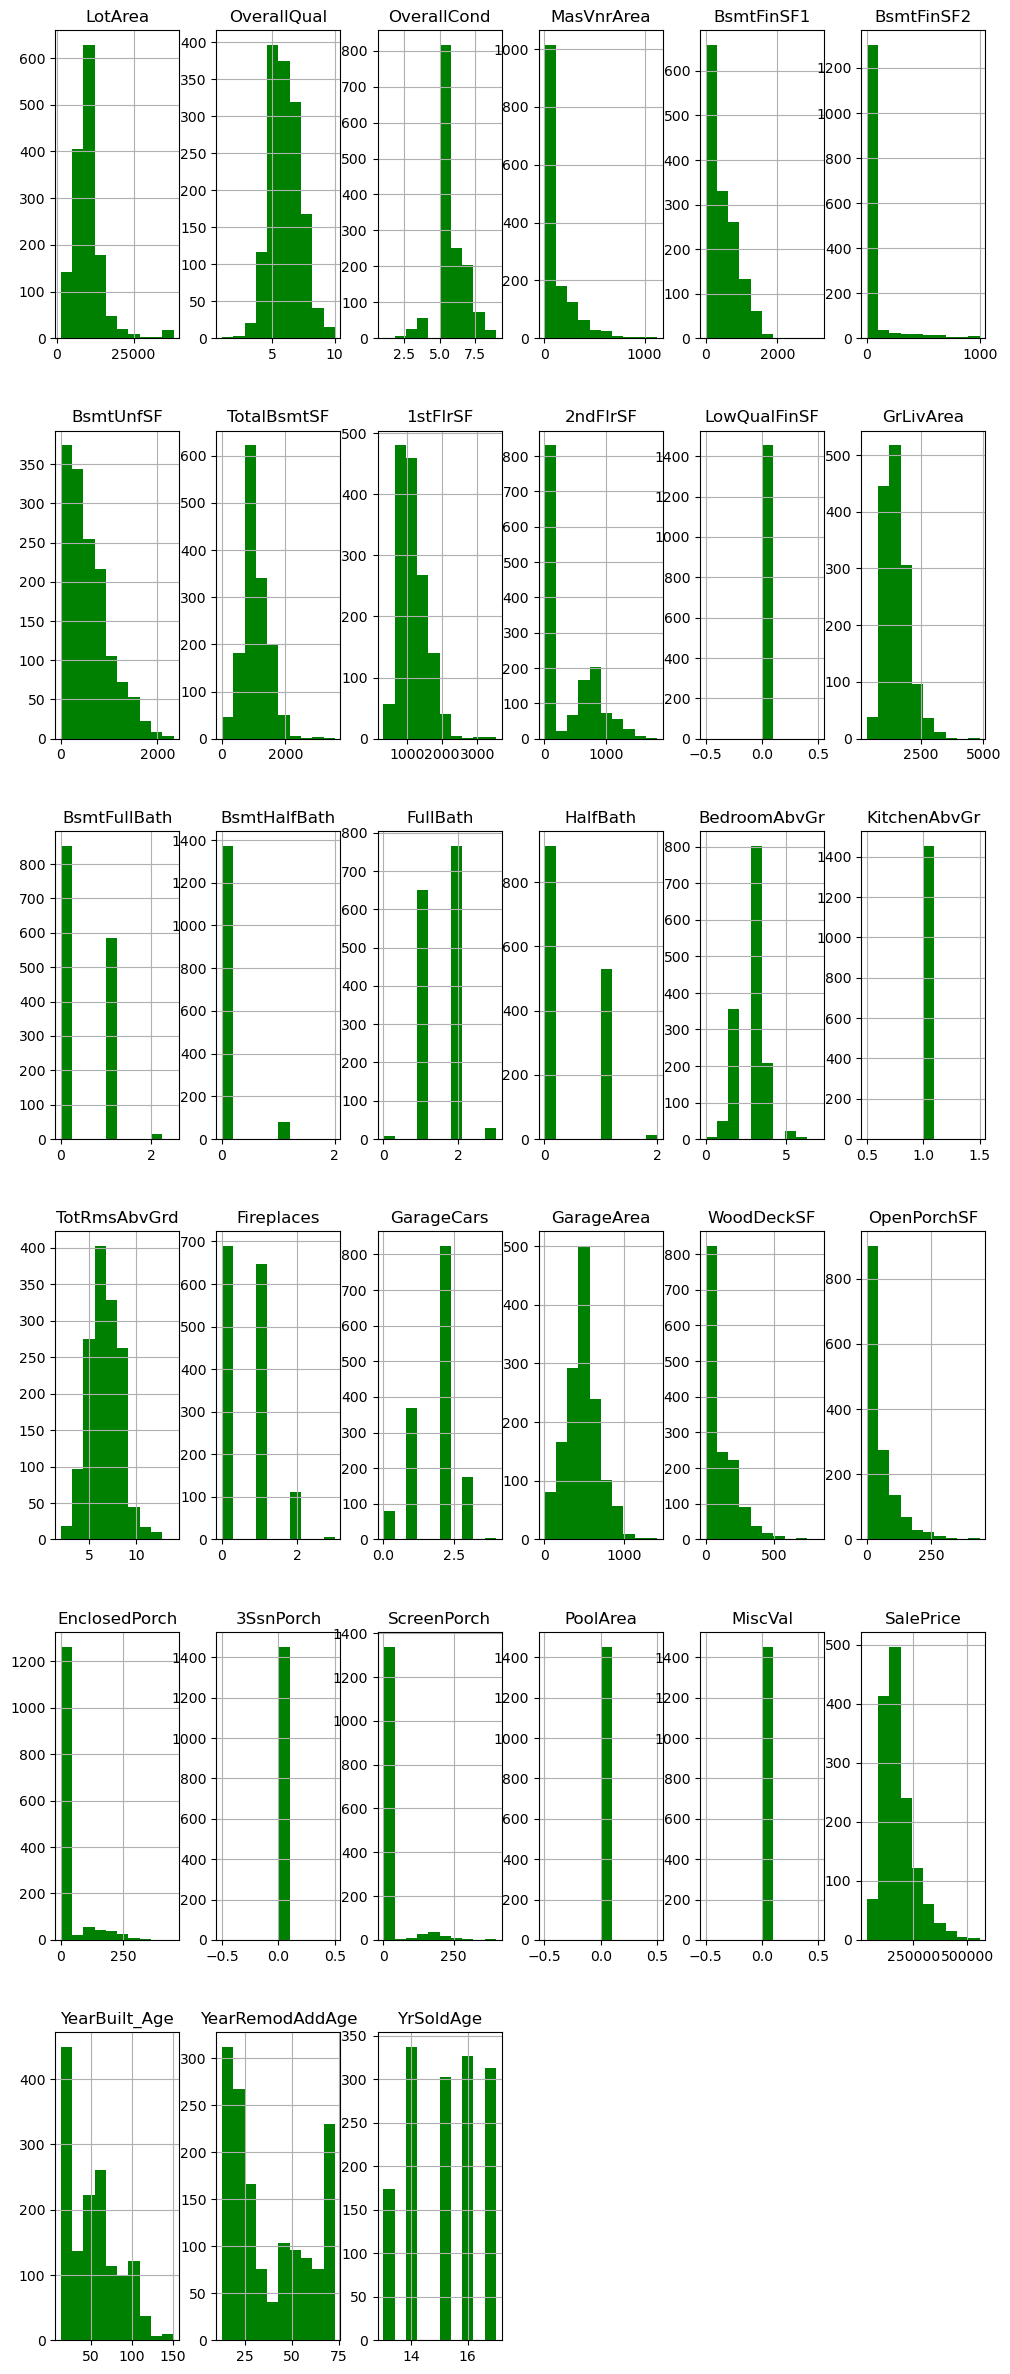

In [46]:
numeric_variables_df.hist(figsize=(12, 30), color = 'g')
plt.show()

**Observations:**
- Most of the properties seem to be sold 14 years back
- Most of the data has `SalePrice` value less than 250,000

In [47]:
# Plotting box plots for all numeric variables to see how the data is distributed
num_var_counts = len(numeric_variables_df.columns)
num_var_counts

33

ncols:  3
nrows:  11


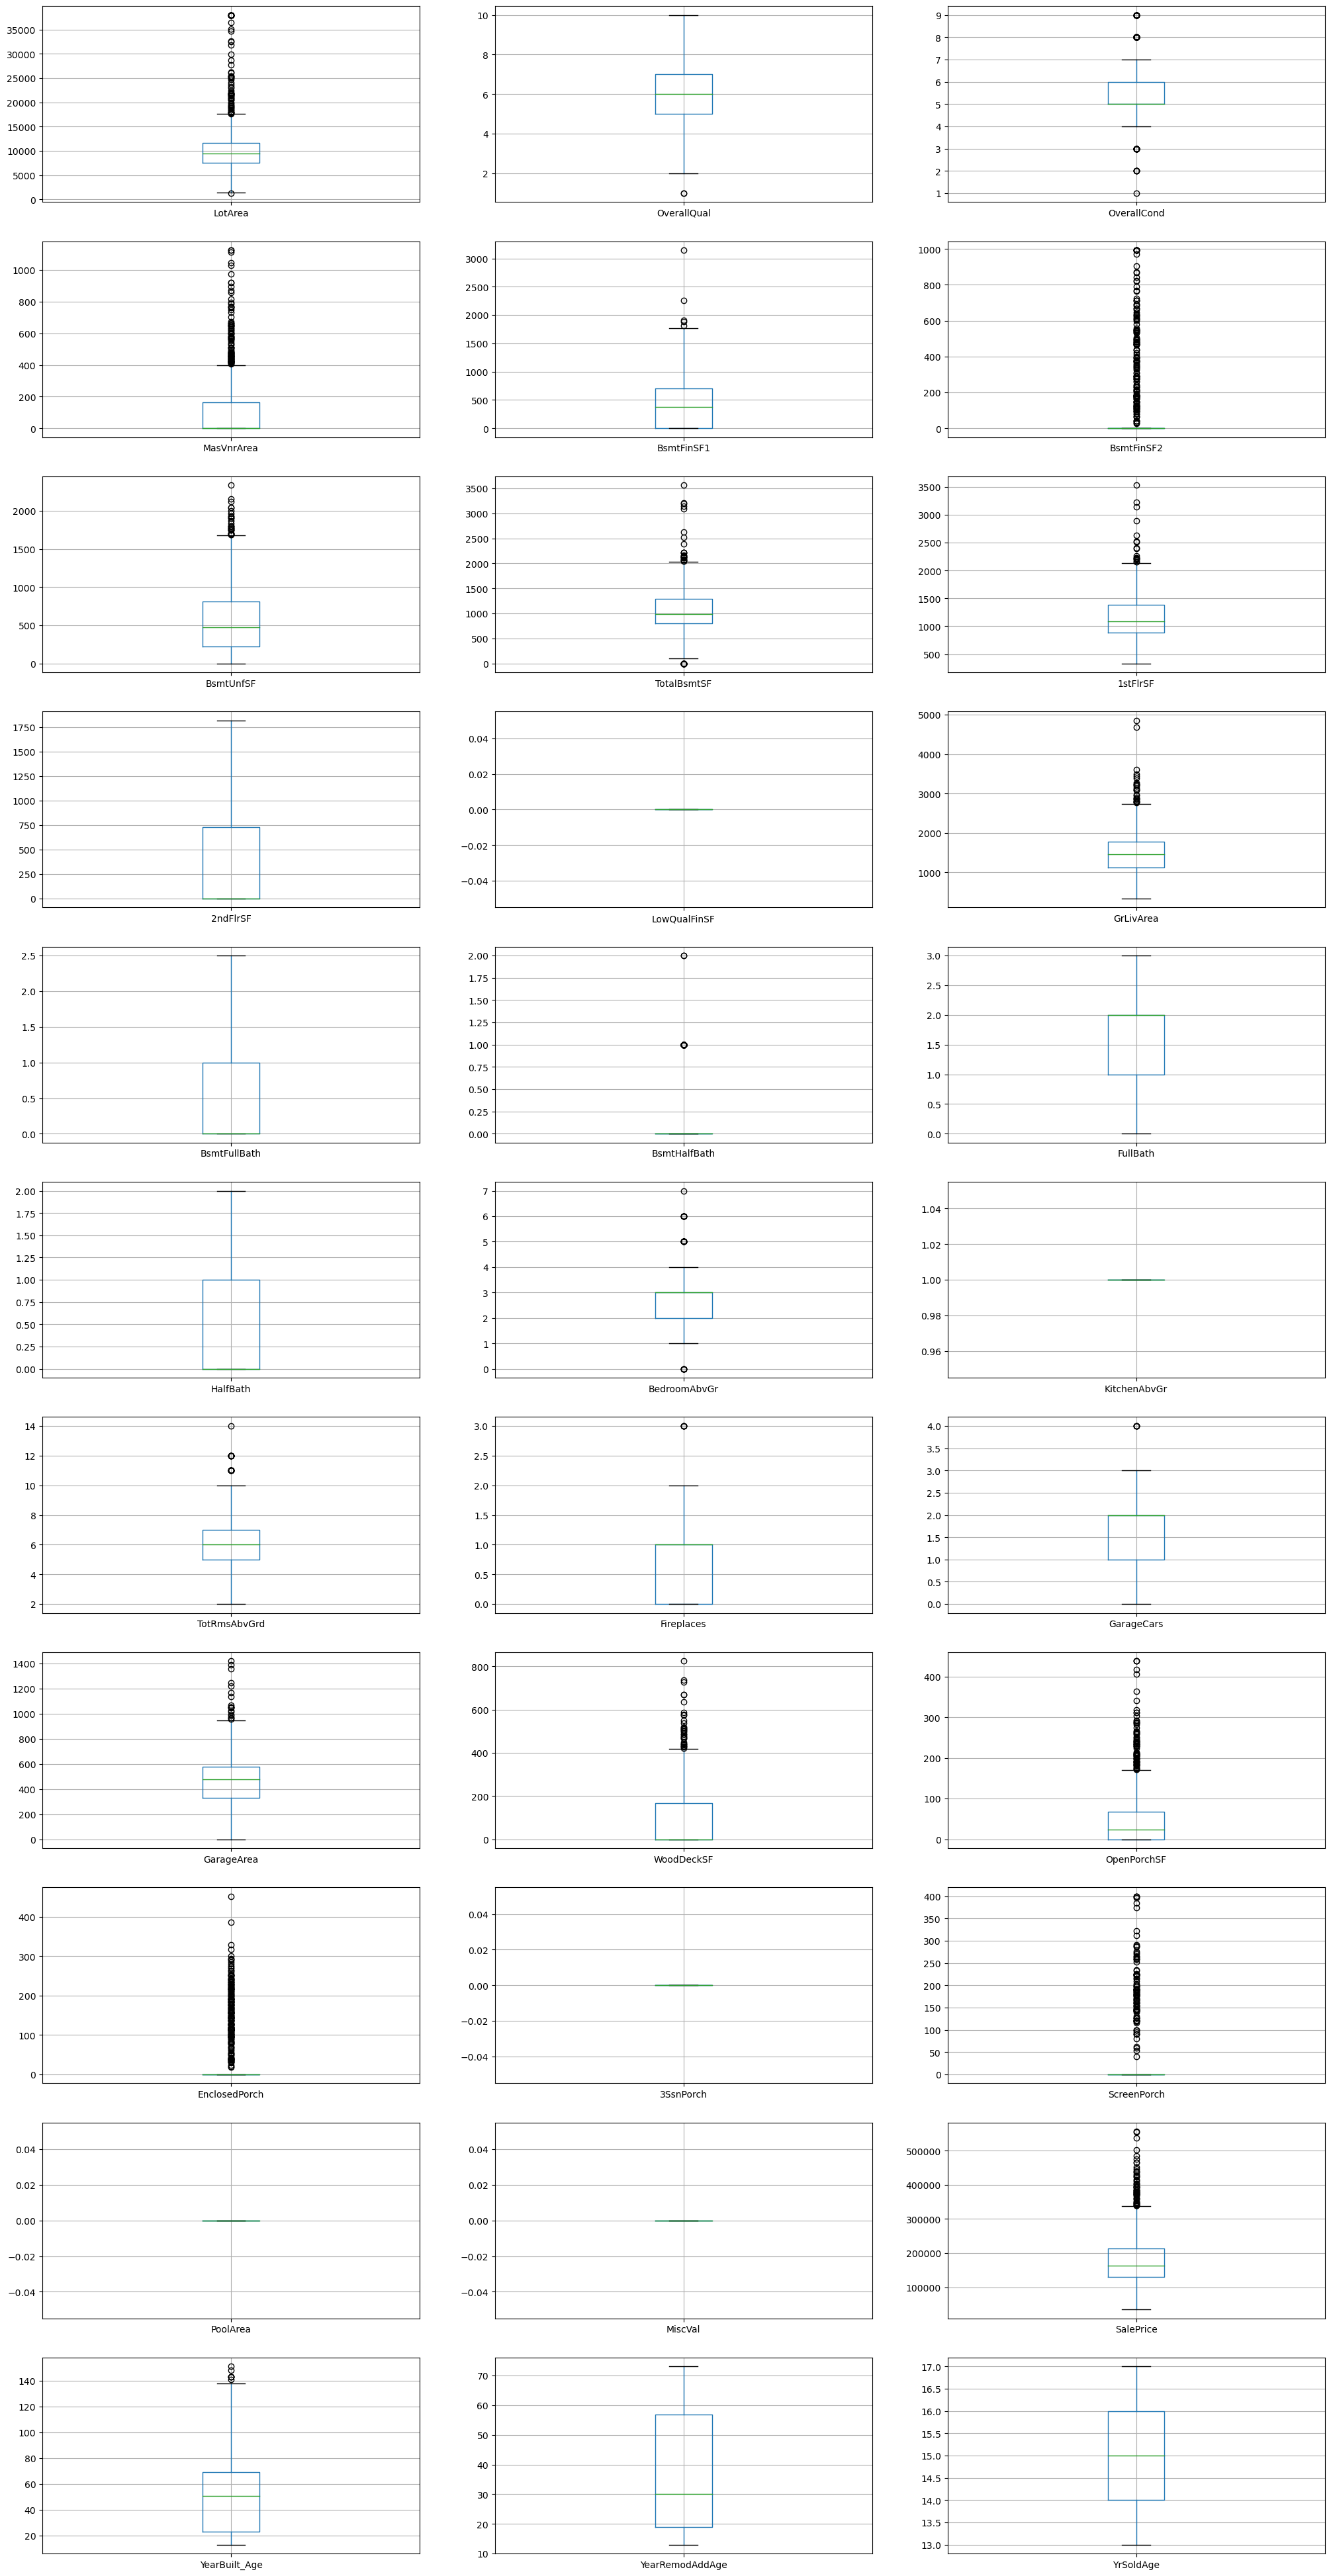

In [48]:
# Plot box plots for all numeric variables at once
ncols = 3
print('ncols: ', ncols)
nrows = int(np.ceil(num_var_counts / ncols))
print('nrows: ',nrows)

plt.figure(figsize=(25,50))
for index, col_name in enumerate(numeric_variables_df.columns):
    plt.subplot(nrows,ncols, index+1)
    numeric_variables_df.boxplot(column=col_name)

plt.show()

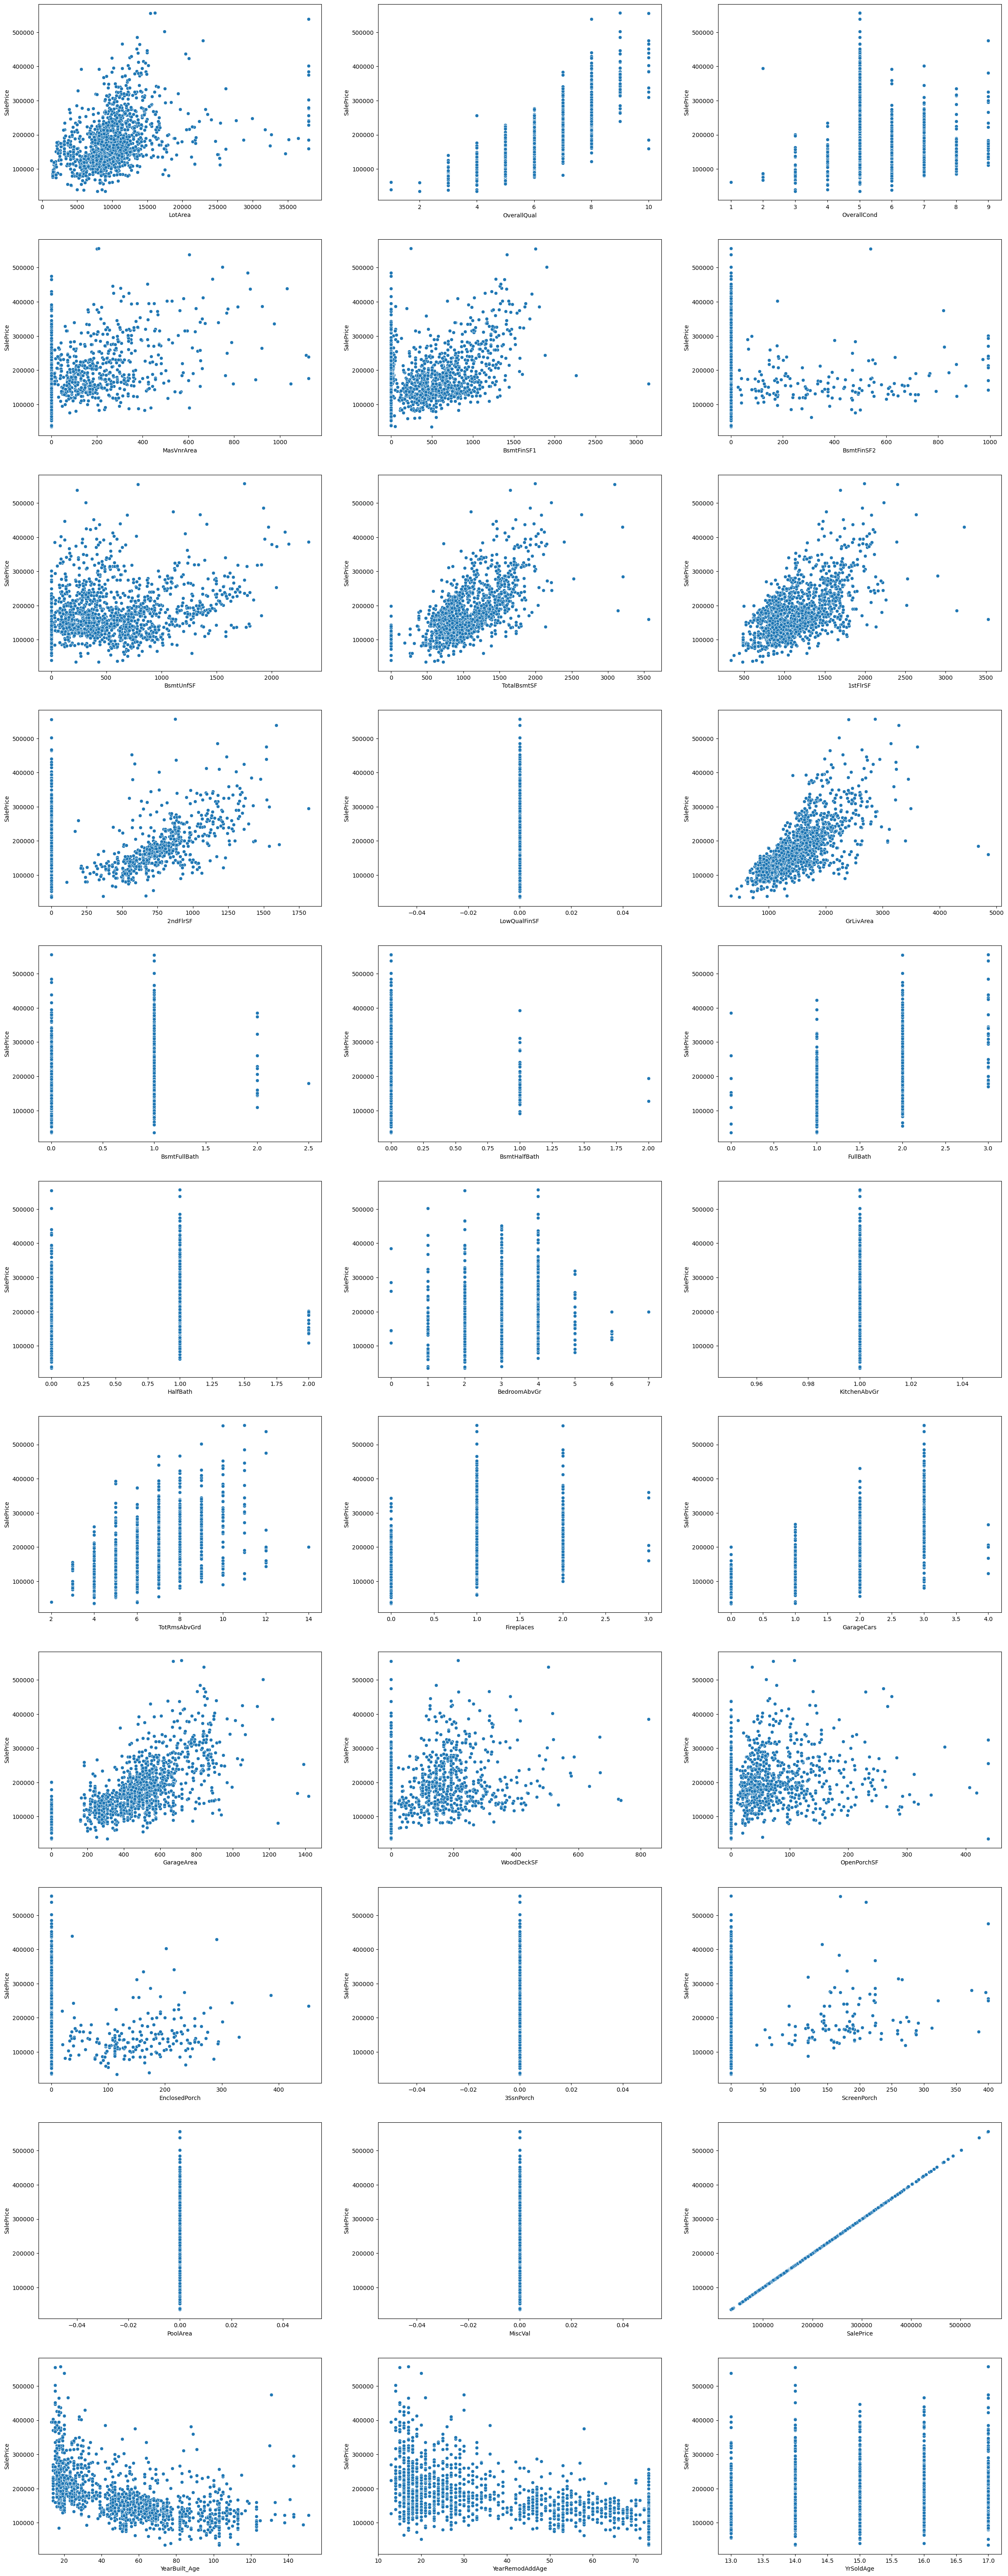

In [49]:
# Plotting a scatter plot to see how the independent variables are related to target variable.
# We will only plot the relations against target variables and not within the independent variables.
n_cols = 3
n_rows = int(np.ceil(num_var_counts / n_cols))
plt.figure(figsize=(30,80))
for index, col_name in enumerate(numeric_variables_df.columns):
    plt.subplot(n_rows, n_cols,index + 1)
    sns.scatterplot(data=numeric_variables_df, x=col_name,y='SalePrice')
plt.show()

**Observations:**
- Many of the predictor variables actually have discrete values rather than continuous values like `BedroomAbvGr`, `KitchenAbvGr`, `TotRmsAbvGrd`
- But they have numerical significance, hence we will continue to treat them as numeric variables only
- Few predictor variables like `GrLivArea`, `GarageArea`, `TotalBsmtSF` seem to have a very good linear relationship

**Plotting heatmap to quantify & observe the correlation coefficients**

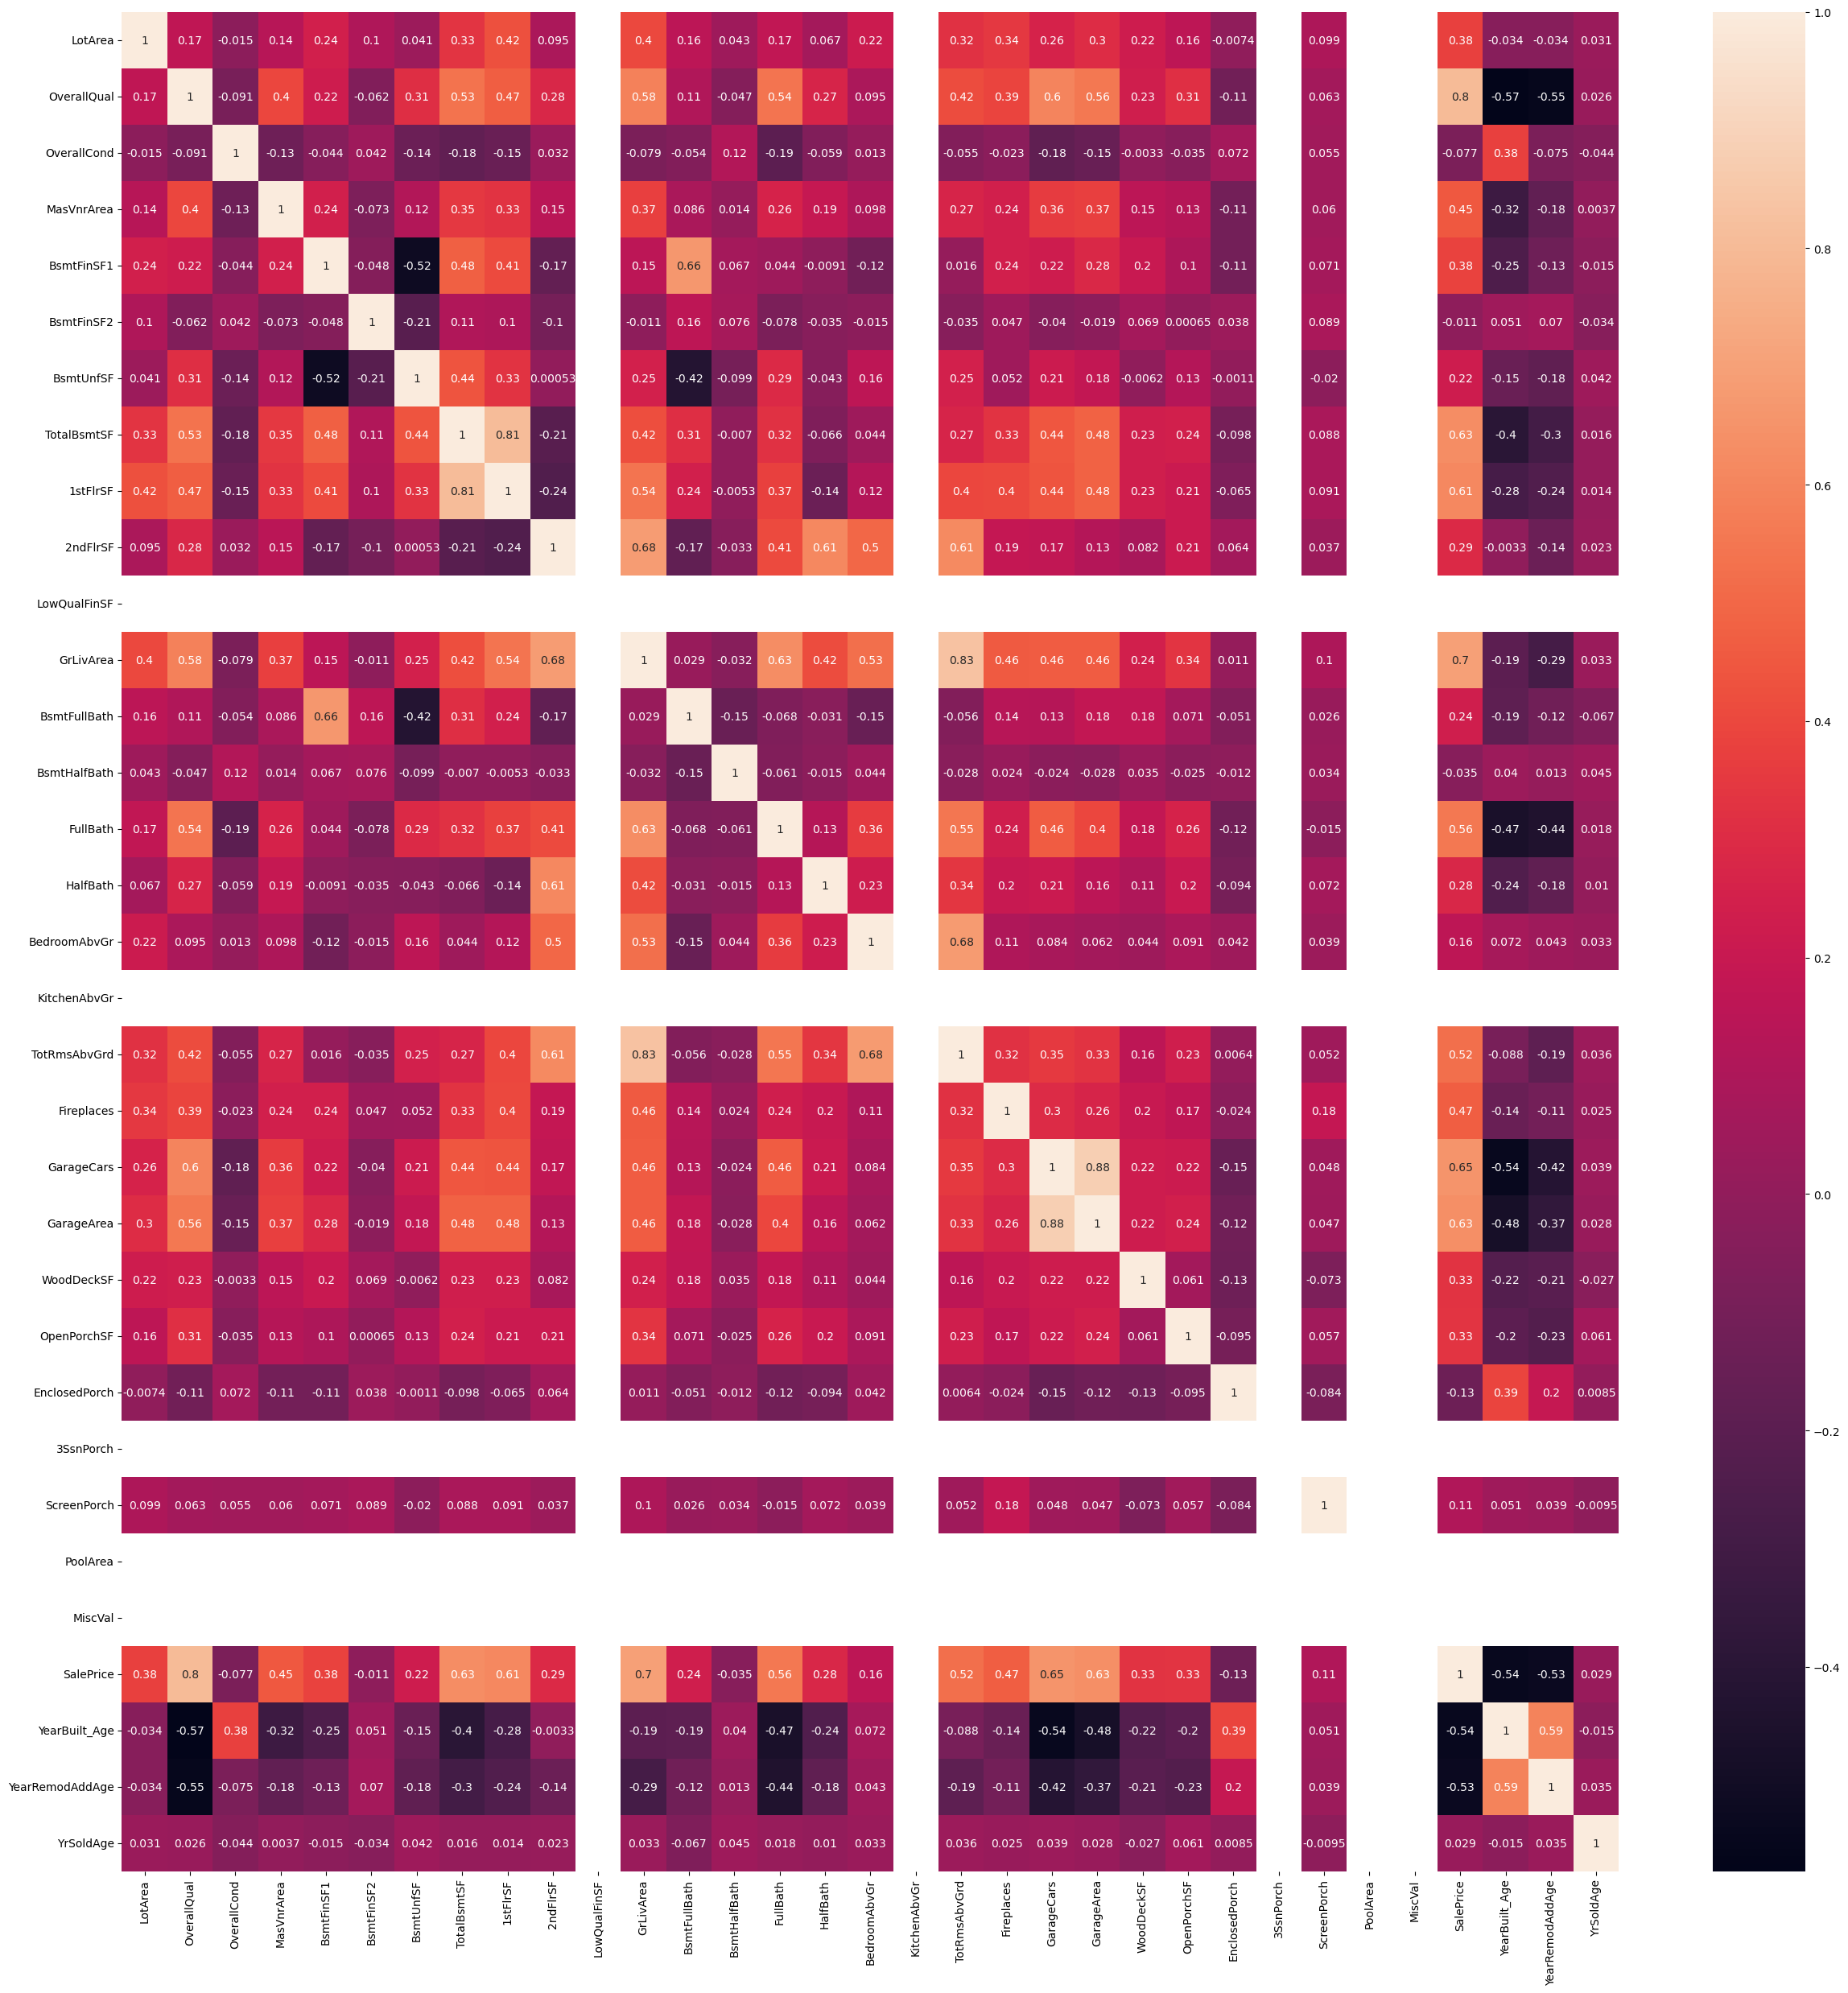

In [50]:
# Plotting a heatmap to observe the correlation coefficients
corr_data = numeric_variables_df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(data=corr_data,annot=True)
plt.show()

**Observations:**
- As we have too many numeric predictor variables, it is little bit difficult to observe meaningful correlations in the above data
- So we will instead plot a heatmap with only significant correlations like say either <= -0.4 or >= 0.5
- One quick observation is there seems to be some numeric variables which have only one single value and that's the reason correlation seems to be zero for some

**Plotting heatmap with only significant correlations**

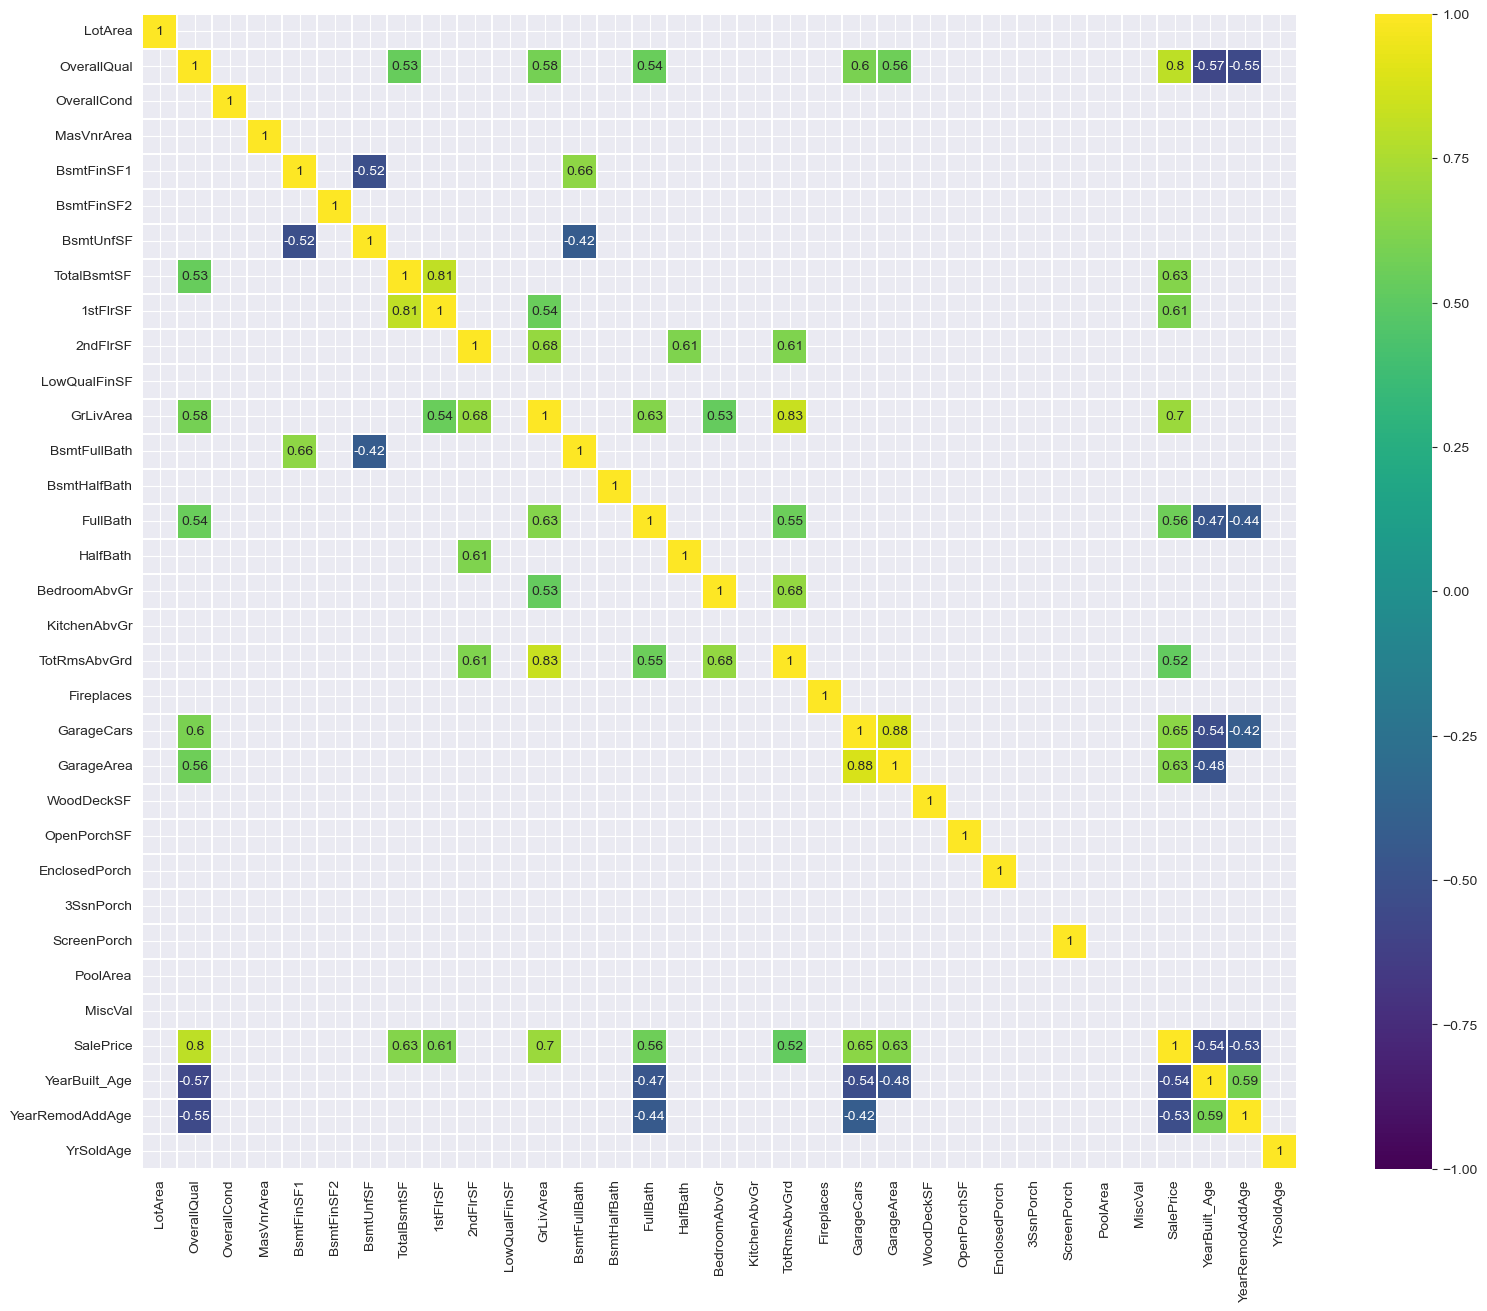

In [51]:
# Plot heatmap with only significant correlations either <= -0.4 or >= 0.5
sns.set_style(style='darkgrid')
plt.figure(figsize=(20,15))
sns.heatmap(corr_data[(corr_data <= -0.4) | (corr_data >= 0.5)],
            cmap='viridis',
            vmax=1.0, vmin=-1.0,annot=True,square=True,
            linewidths=0.1,annot_kws={'size':10})
plt.show()

**Observations:**
- **`OverallQual` is the predictor variable which is having the highest / significant positive correlation coefficient** and it makes sense as the target variable `SalePrice` will be heavily dependent on the overall quality of the property.
- Next significant variables are `GrLivArea`, `TotalBsmtSF`, `GarageArea`, `GarageCars`, `FullBath` which also can be explained
- At the same time, `YearBuilt_Age`, `YearRemodAddAge` are the **most significant negatively correlated predictor variables**. This can also be understood by the fact that as the age of the property / age of the last remodelled date increases, property sale value decreases.
- Another key observations is there is **strong multi-collinearity among few of the predictor variables**. For example, `GrLivArea` has a strong multi-collinearity with `TotRoomsAbvGrid`

In [52]:
# Observing how the target variable price varies with categorical variables
categorical_variables_df = housing_data.select_dtypes(include='object')
categorical_variables_df.head()

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd       None        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng       None        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       Gd       TA           No          GLQ          Unf    GasA        Ex   
1       Gd       TA           Gd          ALQ          Unf    GasA        Ex   
2       Gd       TA           Mn          GLQ          Unf    GasA        Ex   
3       TA       Gd           No          ALQ          Unf    GasA        Gd   
4       Gd       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0          Y      SBrkr          Gd        Typ     Attchd          RFn   
1          Y      SBrkr          TA        Typ     Attchd          RFn   
2          Y      SBrkr          Gd        Typ     Attchd          RFn   
3          Y      SBrkr          Gd        Typ     Detchd          Unf   
4          Y      SBrkr          Gd        Typ     Attchd          RFn   

  GarageQual GarageCond PavedDrive MoSold SaleType SaleCondition  
0         TA         TA          Y      2       WD        Normal  
1         TA         TA          Y      5       WD        Normal  
2         TA         TA          Y      9       WD        Normal  
3         TA         TA          Y      2       WD       Abnorml  
4         TA         TA          Y     12       WD        Normal

In [53]:
categorical_variables_count = len(categorical_variables_df.columns)
categorical_variables_count

40

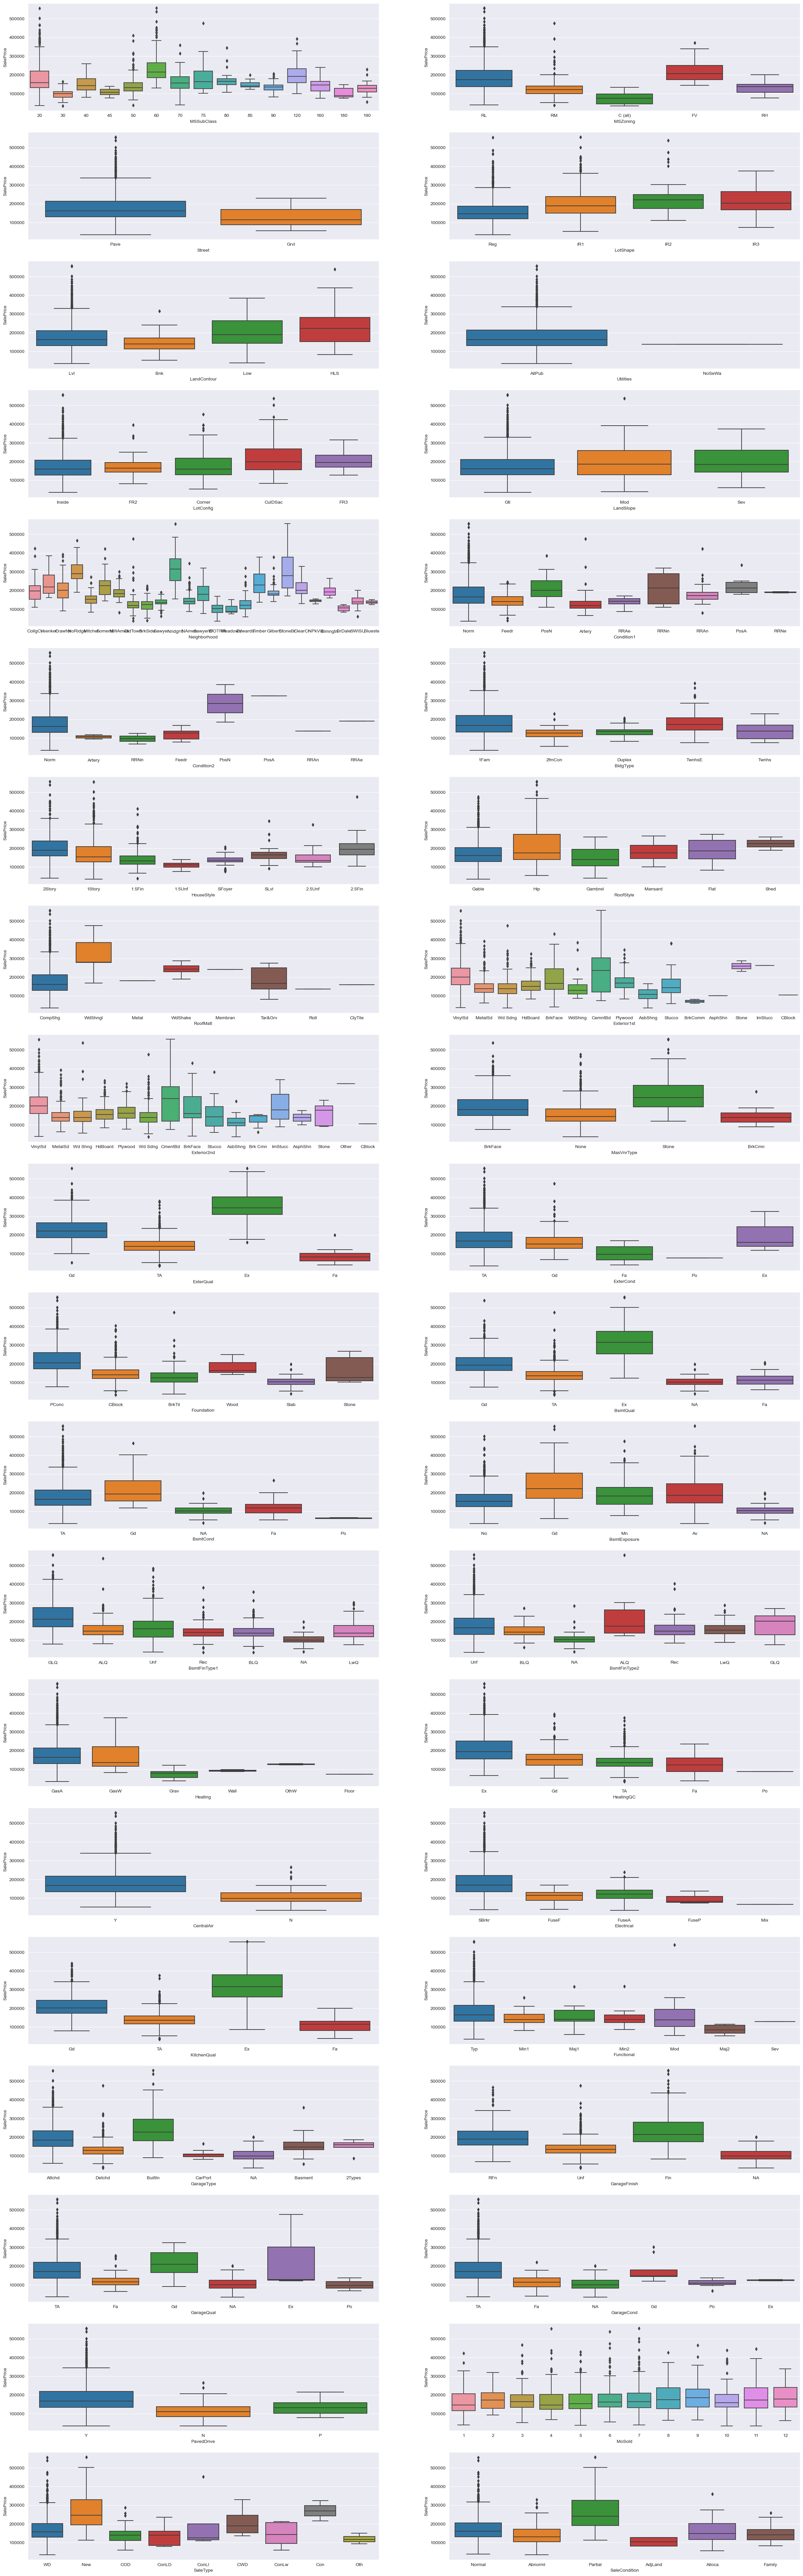

In [54]:
ncols = 2
nrows = int(np.ceil(categorical_variables_count / ncols))

plt.figure(figsize=(30, 100))
for index, col_name in enumerate(categorical_variables_df.columns):
    plt.subplot(nrows, ncols, index+1)
    sns.boxplot(housing_data, x=col_name, y='SalePrice')

plt.show()

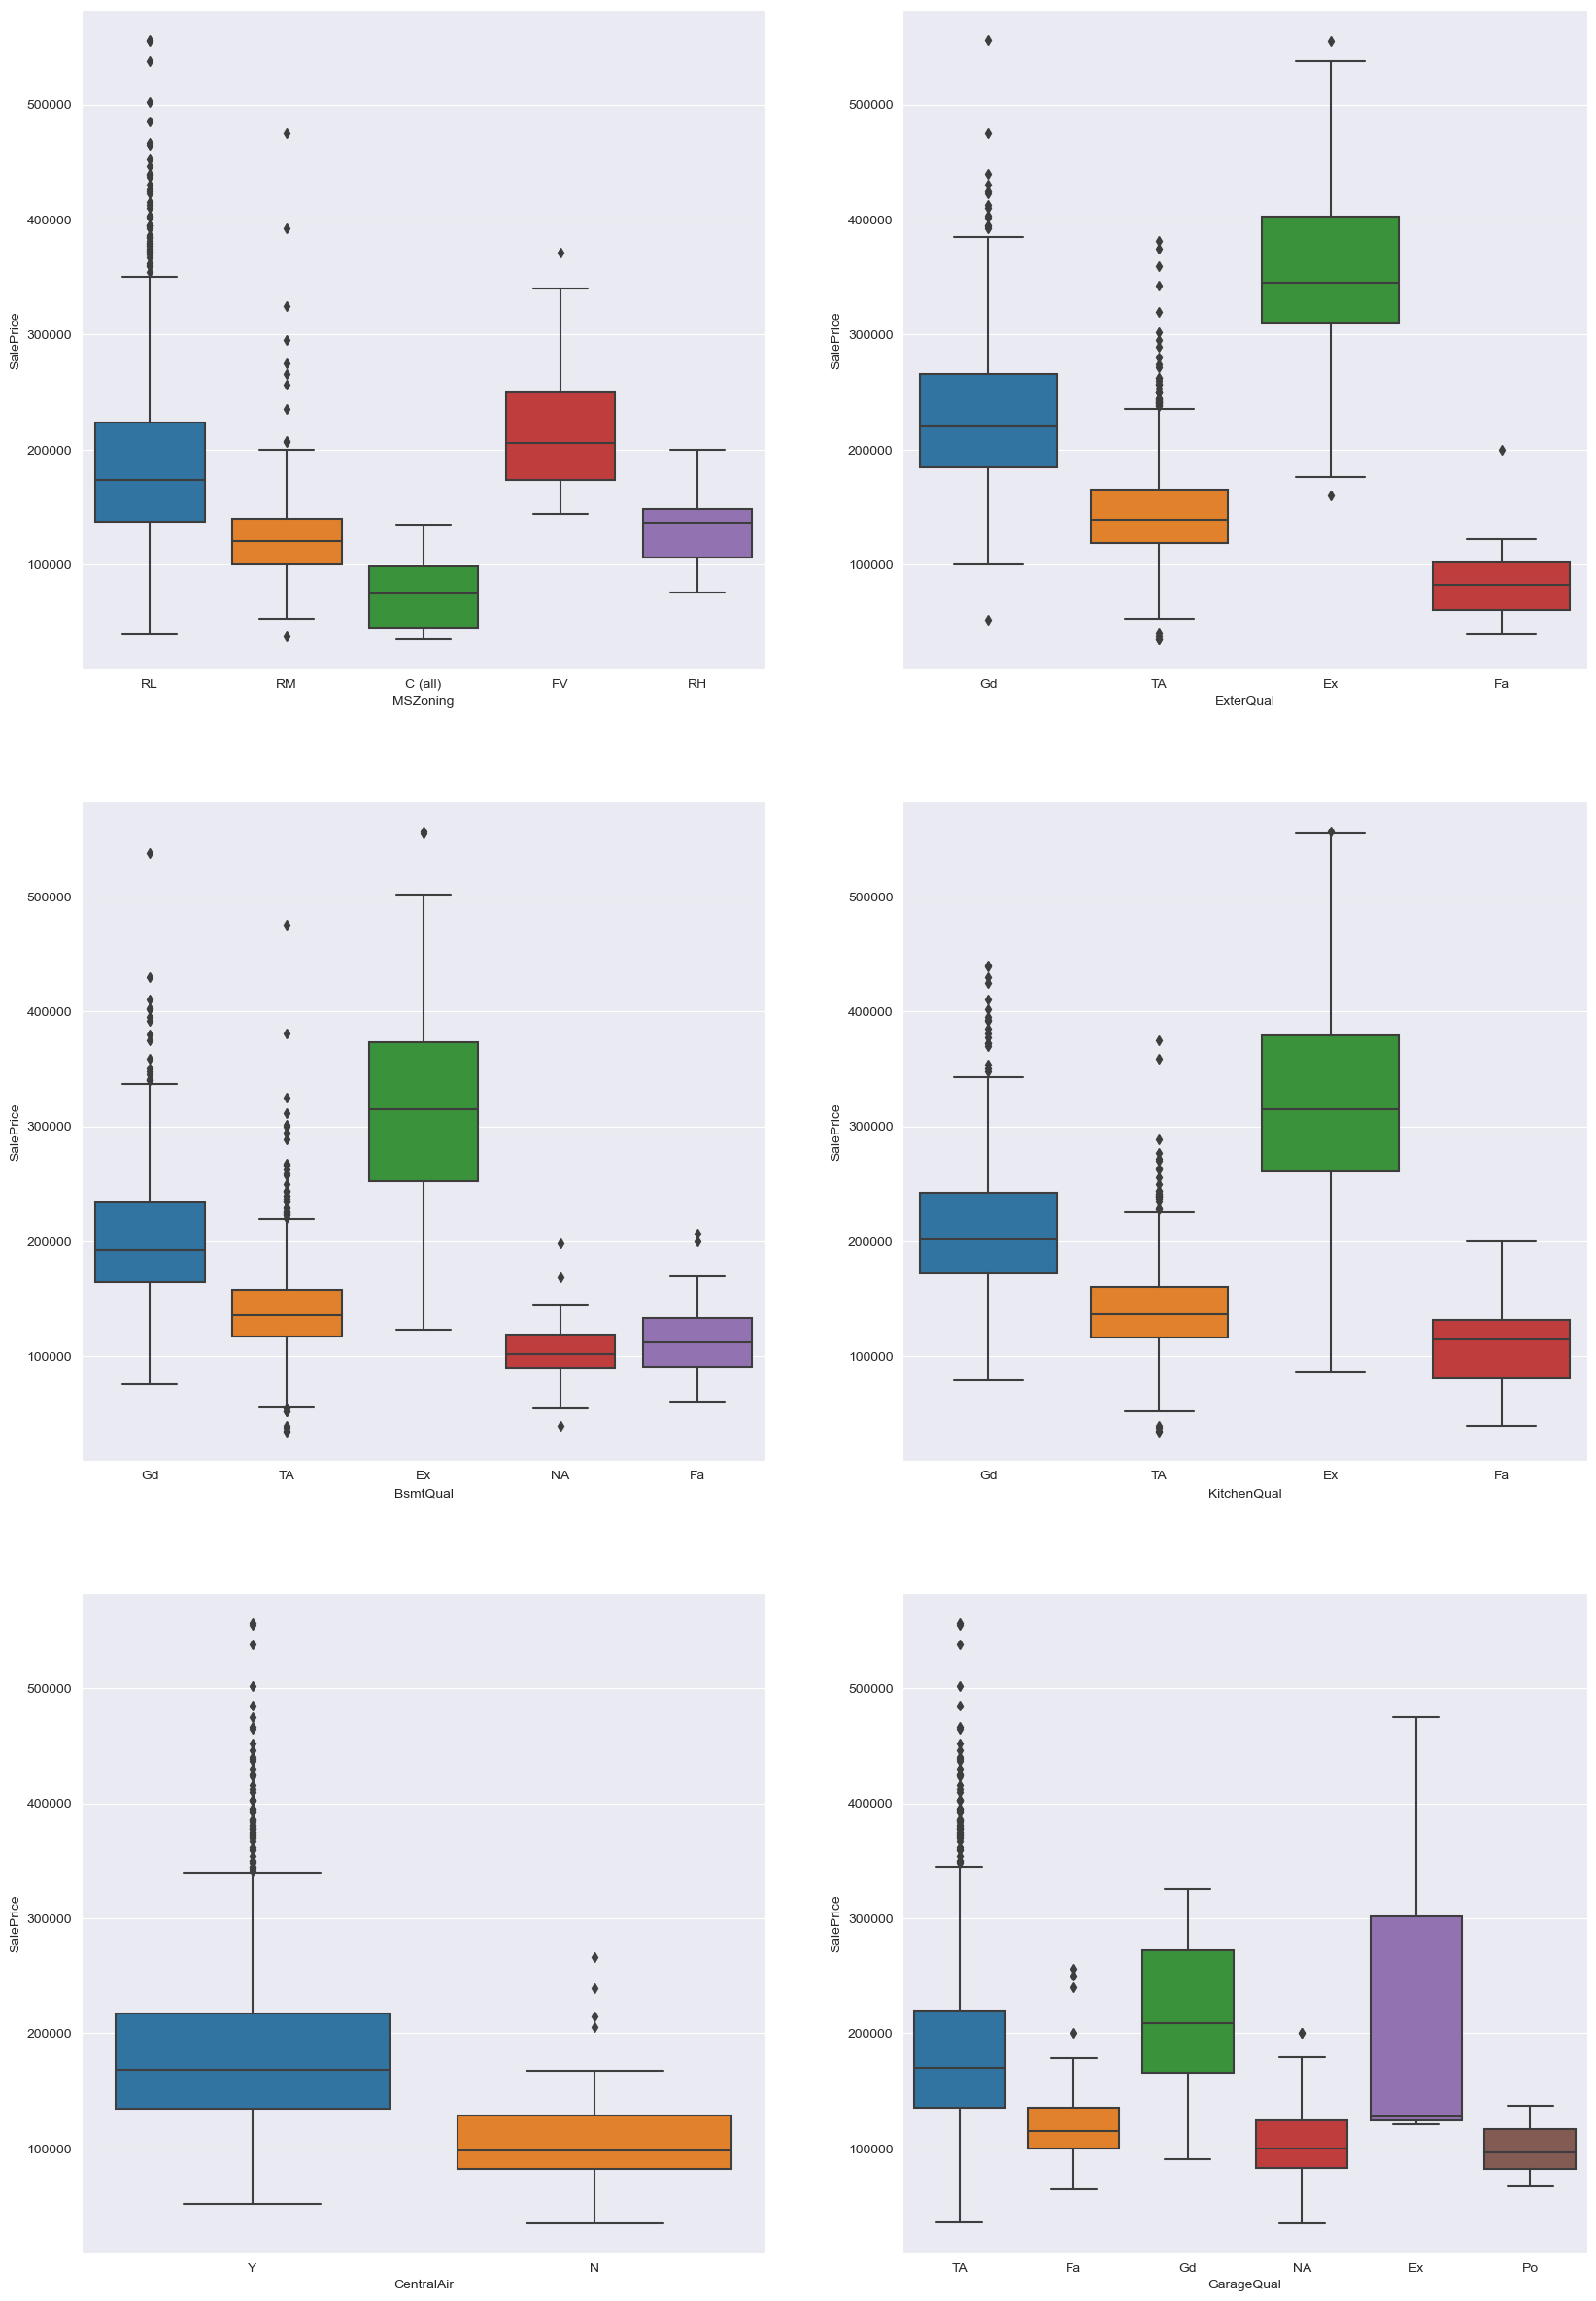

In [55]:
# Plotting box plots again specifically for few of the categorical variables 
#where there is a significant difference in mean sale price across different categories of it
cat_vars_with_sig_diff = ['MSZoning','ExterQual','BsmtQual','KitchenQual','CentralAir','GarageQual',]

ncols = 2
nrows = int(np.ceil(len(cat_vars_with_sig_diff) / ncols))

plt.figure(figsize=(20, 30))
for index, col_name in enumerate(cat_vars_with_sig_diff):
    plt.subplot(nrows, ncols, index+1)
    sns.boxplot(housing_data, x=col_name, y='SalePrice')

plt.show()

**Observations:**
- **Average / Median Sale price is considerably high when the quality is excellent.** This is clearly evident from the above plots for `ExterQual`,`BsmtQual`,`KitchenQual`,`GarageQual` predictor variables
- Sale price is higher when it is Centrally Air conditioned

<a id='data_preprocessing'> </a>
## Preprocessing steps

On a high level, we need to do the following as part of pre-processing steps to get our data ready to build the model
- Encode the categorical variables using either label encoding or one-hot encoding
- Splitting the data into train & test sets
- Scale the features

In [56]:
housing_data.head(10)

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0         60       RL   8450.0   Pave      Reg         Lvl    AllPub   
1         20       RL   9600.0   Pave      Reg         Lvl    AllPub   
2         60       RL  11250.0   Pave      IR1         Lvl    AllPub   
3         70       RL   9550.0   Pave      IR1         Lvl    AllPub   
4         60       RL  14260.0   Pave      IR1         Lvl    AllPub   
5         50       RL  14115.0   Pave      IR1         Lvl    AllPub   
6         20       RL  10084.0   Pave      Reg         Lvl    AllPub   
7         60       RL  10382.0   Pave      IR1         Lvl    AllPub   
8         50       RM   6120.0   Pave      Reg         Lvl    AllPub   
9        190       RL   7420.0   Pave      Reg         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   
5    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin   
6    Inside       Gtl      Somerst       Norm       Norm     1Fam     1Story   
7    Corner       Gtl       NWAmes       PosN       Norm     1Fam     2Story   
8    Inside       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin   
9    Corner       Gtl      BrkSide     Artery     Artery   2fmCon     1.5Unf   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   
5            5            5     Gable  CompShg     VinylSd     VinylSd   
6            8            5     Gable  CompShg     VinylSd     VinylSd   
7            7            6     Gable  CompShg     HdBoard     HdBoard   
8            7            5     Gable  CompShg     BrkFace     Wd Shng   
9            5            6     Gable  CompShg     MetalSd     MetalSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   
5       None         0.0        TA        TA       Wood       Gd       TA   
6      Stone       186.0        Gd        TA      PConc       Ex       TA   
7      Stone       240.0        TA        TA     CBlock       Gd       TA   
8       None         0.0        TA        TA     BrkTil       TA       TA   
9       None         0.0        TA        TA     BrkTil       TA       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ       706.0          Unf         0.0        150   
1           Gd          ALQ       978.0          Unf         0.0        284   
2           Mn          GLQ       486.0          Unf         0.0        434   
3           No          ALQ       216.0          Unf         0.0        540   
4           Av          GLQ       655.0          Unf         0.0        490   
5           No          GLQ       732.0          Unf         0.0         64   
6           Av          GLQ      1369.0          Unf         0.0        317   
7           Mn          ALQ      

<a id='encoding_categorical_variables'> </a>
### Encoding the categorical variables

#### Using One-hot encoding for categorical variables

In [57]:
dummies = pd.get_dummies(data=categorical_variables_df, drop_first=True)
print(dummies.shape)
dummies.head()

(1454, 230)


MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_

**Observations:**
- We got 230 dummies to be added to the original dataset. 
- Adding all of them will make the model more complex. **So we'll check these dummies once again to see if we have heavily skewed dummies**

**Observing the value counts of categorical variables to see if there is any heavy imbalance**

In [58]:
dummies['MSSubClass_40'].value_counts()

0    1450
1       4
Name: MSSubClass_40, dtype: int64

In [59]:
dummies['MSSubClass_180'].value_counts()

0    1444
1      10
Name: MSSubClass_180, dtype: int64

**Observations:**
- It seems few categorical variables have heavy imbalance. Since such dummy variables may not have much influence on the target variable, it's better to drop such heavily skewed / imbalanced ones.

In [60]:
# This seems to be heavily imbalanced and hence this may not have any influence on the target variable
# Dropping such dummy variables without using for model building
dummy_value_count_threshold = np.floor(0.95 * len(dummies.index))
print('Number of rows / Observations: ', len(dummies.index))
print('Dummy Value count Threshold being used (95%): ',dummy_value_count_threshold)

# Capturing such predictor variables in dummies which are heavily imbalanced
dummy_cols_to_drop = []
for dummy_col in dummies:
    if dummies[dummy_col].value_counts()[0] > dummy_value_count_threshold:
        dummy_cols_to_drop.append(dummy_col)

#print(dummy_cols_to_drop)
print('Number of dummies which have counts greater than threshold: ',len(dummy_cols_to_drop))

Number of rows / Observations:  1454
Dummy Value count Threshold being used (95%):  1381.0
Number of dummies which have counts greater than threshold:  139


In [61]:
# Dropping those dummies which are heavily imbalanced / skewed
dummies = dummies.drop(columns=dummy_cols_to_drop)
dummies.shape

(1454, 91)

In [62]:
# Adding the dummies to the original data set
housing_data = pd.concat([housing_data,dummies], axis=1)
print(housing_data.shape)
housing_data.head()

(1454, 164)


MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0         60       RL   8450.0   Pave      Reg         Lvl    AllPub   
1         20       RL   9600.0   Pave      Reg         Lvl    AllPub   
2         60       RL  11250.0   Pave      IR1         Lvl    AllPub   
3         70       RL   9550.0   Pave      IR1         Lvl    AllPub   
4         60       RL  14260.0   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ       706.0          Unf         0.0        150   
1           Gd          ALQ       978.0          Unf         0.0        284   
2           Mn          GLQ       486.0          Unf         0.0        434   
3           No          ALQ       216.0          Unf         0.0        540   
4           Av          GLQ       655.0          Unf         0.0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        856.0    GasA        Ex          Y      SBrkr     856.0       854   
1       1262.0    GasA        Ex          Y      SBrkr    1262.0         0   
2        920.0    GasA        Ex          Y      SBrkr     920.0       866   
3        756.0    GasA        Gd          Y      SBrkr     961.0       756   
4       1145.0    GasA        Ex          Y      SBrkr    1145.0      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0     1710.0           1.0             0         2         1   
1             0     1262.0           0.0             1         2         0   
2             0     1786.0           1.0             0         2         1   
3             0     1717.0           1.0             0         1         0   
4             0     2198.0           1.0             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  ... ExterQual_Gd  \
0             3             1          Gd             8  ...            1   
1             3             1          TA             6  ...            0   
2             3             1          Gd             6  ...            1   
3             3             1          Gd             7  ...            0   
4             4             1          Gd             9  ...            1   

   ExterQual_TA ExterCond_Gd ExterCond_TA  Foundation_CBlock  \
0             0            0            1                  0   
1             1            0            1                  1   
2             0            0            1                  0   
3             1            0            1       

In [63]:
# Dropping the original categorical variables from the data
housing_data.drop(columns=categorical_variables_df.columns, inplace=True)
housing_data.shape

(1454, 124)

<a id='splitting-the-data'> </a>
### Splitting the data into train and test sets

In [64]:
# Splitting the data into train and test sets
train_data, test_data = train_test_split(housing_data,train_size=0.7, random_state=42)
print(train_data.shape)
print(test_data.shape)

(1017, 124)
(437, 124)


<a id='rescaling-features'> </a>
### Rescaling features

In [65]:
# Using min max scaling to scale the data on train and test sets so that the data is uniform 
# and coefficients are stable
scaler = MinMaxScaler()
# Applying the scaling only on numeric variables
train_data[numeric_variables_df.columns] = scaler.fit_transform(train_data[numeric_variables_df.columns])
train_data.head()

LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
464   0.190122     0.444444        0.500    0.147505    0.195758    0.000000   
471   0.286622     0.666667        0.625    0.000000    0.000000    0.000000   
1332  0.202370     0.333333        0.625    0.000000    0.219274    0.000000   
435   0.251414     0.666667        0.625    0.000000    0.122348    0.346251   
1210  0.266511     0.555556        0.500    0.000000    0.000000    0.000000   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
464    0.181507     0.291971  0.220908  0.000000           0.0   0.156169   
471    0.345890     0.226839  0.258769  0.444444           0.0   0.361666   
1332   0.053938     0.229085  0.150818  0.000000           0.0   0.106619   
435    0.029966     0.224312  0.154260  0.458746           0.0   0.293535   
1210   0.451627     0.296182  0.225602  0.434543           0.0   0.334237   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
464            0.0           0.0  0.666667       0.0      0.428571   
471            0.0           0.0  0.666667       0.5      0.428571   
1332           0.5           0.0  0.333333       0.0      0.285714   
435            0.5           0.0  0.666667       0.5      0.428571   
1210           0.0           0.0  0.666667       0.5      0.428571   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
464            0.0      0.250000    0.000000        0.00    0.000000   
471            0.0      0.500000    0.333333        0.50    0.376587   
1332           0.0      0.083333    0.333333        0.25    0.203103   
435            0.0      0.333333    0.333333        0.50    0.387870   
1210           0.0      0.500000    0.333333        0.50    0.325811   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
464     0.000000      0.00000            0.0        0.0         0.00   
471     0.000000      0.00000            0.0        0.0         0.69   
1332    0.000000      0.00000            0.0        0.0         0.00   
435     0.191660      0.13915            0.0        0.0         0.00   
1210    0.770281      0.23724            0.0        0.0         0.00   

      PoolArea  MiscVal  SalePrice  YearBuilt_Age  YearRemodAddAge  YrSoldAge  \
464        0.0      0.0   0.171313       0.231884         0.533333       0.25   
471        0.0      0.0   0.298212       0.239130         0.550000       0.75   
1332       0.0      0.0   0.125168       0.521739         0.866667       0.25   
435        0.0      0.0   0.340511       0.101449         0.233333       0.25   
1210       0.0      0.0   0.296289       0.130435         0.300000       0.00   

      MSSubClass_50  MSSubClass_60  MSSubClass_120  MSZoning_RL  MSZoning_RM  \
464               0              0               0            1            0   
471               0              1               0            1            0   
1332              0              0               0            1            0   
435               0              1               0            1            0   
1210              0              1               0            1            0   

      Street_Pave  LotShape_Reg  LandContour_Lvl  LotConfig_CulDSac  \
464             1             1                0                  0   
471             1             1                1                  0   
1332            1             1                1                  0   
435             1             0                1                  1   
1210            1             1                1                  0   

      LotConfig_Inside  Neighborhood_CollgCr  Neighborhood_Edwards  \
464                  1                     1                     0   
471                  1                     0                     0   
1332                 1                     0                     1   
435                  0                     1                     0   
1210                 1         

In [66]:
# Scaling the test data as well but only using transform of the scaler
test_data[numeric_variables_df.columns] = scaler.transform(test_data[numeric_variables_df.columns])
test_data.head()

LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
497   0.209028     0.666667        0.625    0.000000    0.104552         0.0   
1265  0.061484     0.666667        0.500    0.236443    0.143005         0.0   
411   0.908527     0.444444        0.500    0.000000    0.335584         0.0   
1184  0.921761     0.444444        0.375    0.245119    0.368317         0.0   
1036  0.312542     0.888889        0.500    0.075922    0.324780         0.0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
497    0.298373     0.288040  0.250008  0.377888           0.0   0.328707   
1265   0.103168     0.193992  0.118589  0.406491           0.0   0.247304   
411    0.000000     0.296463  0.225914  0.000000           0.0   0.159708   
1184   0.176798     0.441325  0.387371  0.000000           0.0   0.273848   
1036   0.255993     0.454801  0.402391  0.000000           0.0   0.284466   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
497            0.5           0.0  0.666667       0.0      0.571429   
1265           0.5           0.0  0.666667       0.5      0.428571   
411            0.5           0.0  0.333333       0.0      0.428571   
1184           0.5           0.0  0.333333       0.5      0.428571   
1036           0.5           0.0  0.666667       0.0      0.285714   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
497            0.0      0.500000    0.000000        0.25    0.169252   
1265           0.0      0.333333    0.000000        0.50    0.356841   
411            0.0      0.250000    0.000000        0.50    0.403385   
1184           0.0      0.250000    0.666667        0.75    0.701693   
1036           0.0      0.333333    0.333333        0.75    0.643159   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
497     0.000000     0.228115            0.0        0.0       0.0000   
1265    0.000000     0.077559            0.0        0.0       0.0000   
411     0.320243     0.000000            0.0        0.0       0.0000   
1184    0.000000     0.599943            0.0        0.0       0.6575   
1036    0.276573     0.000000            0.0        0.0       0.0000   

      PoolArea  MiscVal  SalePrice  YearBuilt_Age  YearRemodAddAge  YrSoldAge  \
497        0.0      0.0   0.286676       0.615942         1.000000       0.50   
1265       0.0      0.0   0.286483       0.079710         0.183333       1.00   
411        0.0      0.0   0.211690       0.398551         0.916667       1.00   
1184       0.0      0.0   0.291867       0.340580         0.783333       0.75   
1036       0.0      0.0   0.539512       0.021739         0.033333       0.25   

      MSSubClass_50  MSSubClass_60  MSSubClass_120  MSZoning_RL  MSZoning_RM  \
497               1              0               0            1            0   
1265              0              0               0            0            0   
411               0              0               0            1            0   
1184              0              0               0            1            0   
1036              0              0               0            1            0   

      Street_Pave  LotShape_Reg  LandContour_Lvl  LotConfig_CulDSac  \
497             1             1                1                  0   
1265            1             1                1                  0   
411             1             1                0                  0   
1184            0             1                1                  0   
1036            1             0                0                  0   

      LotConfig_Inside  Neighborhood_CollgCr  Neighborhood_Edwards  \
497                  1                     0                     0   
1265                 0                     0                     0   
411                  1                     0                     0   
1184                 1                     0                     0   
1036                 1         

In [67]:
# Split the data into X and y
y_train = train_data.pop('SalePrice')
X_train = train_data
print(X_train.shape)
print(y_train.shape)

(1017, 123)
(1017,)


In [68]:
# Split the data into X and y for test data as well
y_test = test_data.pop('SalePrice')
X_test = test_data
print(X_test.shape)
print(y_test.shape)

(437, 123)
(437,)


<a id='model-building'> </a>
## Model Building

<a id='plain-linear-regression-model'> </a>
### Building plain linear regression model

In [69]:
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)

LinearRegression()

In [70]:
print('Intercept :', lm.intercept_)
linear_model_coef_df = pd.DataFrame(list(zip(X_train.columns, lm.coef_)))
linear_model_coef_df.rename(columns={0: 'Feature Variable', 1: 'Linear Regression Coefficient'}, inplace=True)
#linear_model_coef_df.set_index('Feature Variable', inplace=True)
linear_model_coef_df.sort_values(by='Linear Regression Coefficient', ascending=False, inplace=True)
linear_model_coef_df

Intercept : -0.06583737923281985


Feature Variable  Linear Regression Coefficient
103  GarageFinish_NA                   3.231468e+12
106    GarageQual_NA                   8.542986e+11
108    GarageCond_NA                   8.542986e+11
28           MiscVal                   5.168887e+11
27          PoolArea                   1.693921e+11
..               ...                            ...
4         BsmtFinSF1                  -1.163582e+01
25         3SsnPorch                  -2.192976e+12
102    GarageType_NA                  -4.940065e+12
17      KitchenAbvGr                  -5.204870e+12
10      LowQualFinSF                  -2.401088e+13

[123 rows x 2 columns]

In [71]:
# Predicting the y values on train data and test data
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [72]:
# Determining the r2 scores and train data and test data
train_r2_score = r2_score(y_true=y_train, y_pred=y_train_pred)
print('Train r2 score: ', train_r2_score)

test_r2_score = r2_score(y_true=y_test, y_pred=y_test_pred)
print('Test r2 score: ', test_r2_score)

Train r2 score:  0.8214672466662801
Test r2 score:  0.511056745116649


**Observations:**
- Our plain linear regression model seems to have **overfitted** as there is a significant difference between the training score and the test score
- It does make sense as we have so many predictor variables

<a id='applying-regularization'> </a>
## Applying regularization (Ridge & Lasso)

- Applying regularization as it can reduce the overfitting.
- Using cross validation to figure out the optimal value of alpha for Ridge / Lasso regularization

### Using GridSearchCV to find the optimal values of either Ridge or Lasso regularization

In [73]:
# Build Ridge or Lasso regularization model using GridSearchCV
def build_ridge_lasso_model_using_GridSearchCV(param_grid, scoring,ridge_or_lasso_estimator = 'Ridge'):
    folds = KFold(n_splits=5, shuffle=True, random_state=42)

    if ridge_or_lasso_estimator == 'Lasso':
        estimator = Lasso()
    else:
        ridge_or_lasso_estimator = 'Ridge'
        estimator = Ridge()
    
    model_cv = GridSearchCV(estimator=estimator,
                            param_grid=param_grid,
                            scoring=scoring,
                            cv=folds,
                            verbose=True,
                            return_train_score=True)
    # Fitting the model
    model_cv.fit(X=X_train, y=y_train)
    
    # Evaluating the metrics on the best fit model found using GridSearchCV
    print('*'*100)
    optimal_alpha = model_cv.best_params_['alpha']
    print('Regularization applied: ', ridge_or_lasso_estimator)
    print('Optimal value of alpha determined by our model using GridSearchCV: ', optimal_alpha)
    model_cv_best = model_cv.best_estimator_
    #Predicting values using best fit model
    y_train_pred_model_cv = model_cv_best.predict(X_train)
    y_test_pred_model_cv = model_cv_best.predict(X_test)

    # Evaluating the model
    print('Train r2 score using optimal alpha: ', r2_score(y_true=y_train, y_pred=y_train_pred_model_cv))
    print('Test r2 score using optimal alpha: ', r2_score(y_true=y_test, y_pred=y_test_pred_model_cv))
    print('Train RMSE: ', np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred_model_cv)))
    print('Test RMSE: ', np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred_model_cv)))
    print('*'*100)

    return model_cv_best, model_cv.cv_results_, optimal_alpha

<a id='ridge-regularization'> </a>
## Ridge Regularization

In [74]:
# Applying regularization using Ridge regression for the below values of alpha
ridge_hyperparams = [{'alpha': [0.001, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 100.0]}]

ridge_best, ridgecvresults, ridge_optimal_alpha = build_ridge_lasso_model_using_GridSearchCV(param_grid=ridge_hyperparams, 
scoring='r2', ridge_or_lasso_estimator='Ridge' )

Fitting 5 folds for each of 10 candidates, totalling 50 fits
****************************************************************************************************
Regularization applied:  Ridge
Optimal value of alpha determined by our model using GridSearchCV:  5.0
Train r2 score using optimal alpha:  0.8727036108923479
Test r2 score using optimal alpha:  0.8778301117853583
Train RMSE:  0.05122291827420909
Test RMSE:  0.04912923926295466
****************************************************************************************************


- It looks like optimal value of alpha for Ridge is 5, so running the model again with different hyperparameters close to 5

In [75]:
ridge_hyperparams = [{'alpha': [0.1, 0.5, 1.0, 1.5, 1.75, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,20]}]

ridge_best, ridgecvresults, ridge_optimal_alpha = build_ridge_lasso_model_using_GridSearchCV(param_grid=ridge_hyperparams, 
scoring='r2', ridge_or_lasso_estimator='Ridge' )

Fitting 5 folds for each of 17 candidates, totalling 85 fits
****************************************************************************************************
Regularization applied:  Ridge
Optimal value of alpha determined by our model using GridSearchCV:  6.0
Train r2 score using optimal alpha:  0.8711271706351279
Test r2 score using optimal alpha:  0.8771149574688475
Train RMSE:  0.051539115007197246
Test RMSE:  0.04927282505139525
****************************************************************************************************


**Optimal value of alpha for Ridge regularization: 6.0**

In [76]:
# Verifying the CV results
ridge_model_cv_results = pd.DataFrame(ridgecvresults)
ridge_model_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.008942      0.003102         0.003790        0.003079         0.1   
1        0.008863      0.003233         0.004933        0.004057         0.5   
2        0.007187      0.005224         0.006057        0.003395         1.0   
3        0.006961      0.002941         0.005425        0.003095         1.5   
4        0.005176      0.004360         0.005225        0.003136        1.75   
5        0.010870      0.008236         0.004273        0.003137         2.0   
6        0.005365      0.003368         0.002169        0.002235         3.0   
7        0.007544      0.004229         0.005205        0.005598         4.0   
8        0.010012      0.005396         0.006322        0.004942         5.0   
9        0.011770      0.004329         0.004597        0.004093         6.0   
10       0.009567      0.004014         0.006724        0.003866         7.0   
11       0.015450      0.008236         0.004359        0.006057         8.0   
12       0.007620      0.006067         0.009013        0.004849         9.0   
13       0.012342      0.003801         0.007045        0.001774        10.0   
14       0.007610      0.001396         0.005773        0.003473        11.0   
15       0.011854      0.003701         0.006742        0.000813        12.0   
16       0.012337      0.003433         0.006355        0.003211          20   

             params  split0_test_score  split1_test_score  split2_test_score  \
0    {'alpha': 0.1}           0.579077           0.840724           0.850859   
1    {'alpha': 0.5}           0.596662           0.843961           0.851275   
2    {'alpha': 1.0}           0.612479           0.844311           0.851495   
3    {'alpha': 1.5}           0.624630           0.843783           0.851414   
4   {'alpha': 1.75}           0.629763           0.843362           0.851295   
5    {'alpha': 2.0}           0.634408           0.842877           0.851137   
6    {'alpha': 3.0}           0.649413           0.840591           0.850225   
7    {'alpha': 4.0}           0.660589           0.838092           0.849037   
8    {'alpha': 5.0}           0.669362           0.835571           0.847696   
9    {'alpha': 6.0}           0.676496           0.833097           0.846267   
10   {'alpha': 7.0}           0.682444           0.830692           0.844785   
11   {'alpha': 8.0}           0.687495           0.828362           0.843272   
12   {'alpha': 9.0}           0.691842           0.826105           0.841741   
13  {'alpha': 10.0}           0.695623           0.823917           0.840202   
14  {'alpha': 11.0}           0.698938           0.821793           0.838660   
15  {'alpha': 12.0}           0.701863           0.819727           0.837121   
16    {'alpha': 20}           0.716316           0.804820           0.825111   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.873245           0.862824         0.801345        0.111673   
1            0.875424           0.866118         0.806688        0.105589   
2            0.876717           0.868487         0.810698        0.099783   
3            0.877140           0.869799         0.813353        0.095127   
4            0.877156           0.870222         0.814360        0.093108   
5            0.877083           0.870538         0.815209        0.091253   
6            0.876220           0.871119         0.817514        0.085065   
7            0.874864           0.871099         0.818736        0.080244   
8            0.873283           0.870786         0.819340        0.076312   
9            0.871595           0.870310         0.819553        0.073003   
10           0.869855           0.869735         0.819502        0.070154   
11           0.868093           0.869096         0.819263        0.067661   
12           0.866323           0.868411         0.818884        0.065449   
13           0.864556           0.867693    

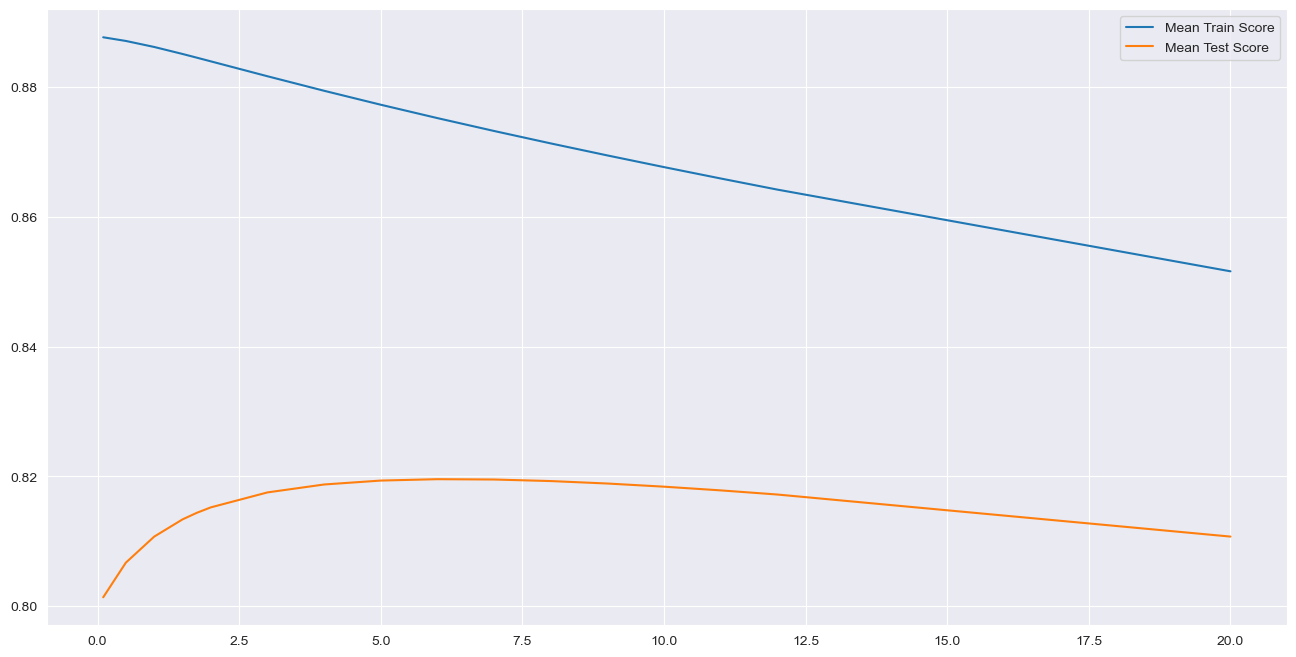

In [77]:
# Plotting the scores from the model cv results for various alpha values
plt.figure(figsize=(16, 8))
plt.plot(ridge_model_cv_results['param_alpha'], ridge_model_cv_results['mean_train_score'])
plt.plot(ridge_model_cv_results['param_alpha'], ridge_model_cv_results['mean_test_score'])
plt.legend(['Mean Train Score', 'Mean Test Score'], loc= 'upper right')
plt.show()

In [78]:
# Verifying the model coefficients after Ridge regularization
print('Ridge Intercept :', ridge_best.intercept_)
ridge_coef_df = pd.DataFrame(list(zip(X_train.columns, ridge_best.coef_)))
ridge_coef_df.rename(columns={0: 'Feature Variable', 1: 'Ridge Coefficients (alpha = 6)'}, inplace=True)
#ridge_coef_df.set_index('Feature Variable', inplace=True)
ridge_coef_df.sort_values(by='Ridge Coefficients (alpha = 6)', ascending=False, inplace=True)
ridge_coef_df.head(20)

Ridge Intercept : -0.09815770770678528


Feature Variable  Ridge Coefficients (alpha = 6)
1            OverallQual                        0.125368
11             GrLivArea                        0.079680
9               2ndFlrSF                        0.077856
20            GarageCars                        0.076200
8               1stFlrSF                        0.072581
18          TotRmsAbvGrd                        0.069315
7            TotalBsmtSF                        0.066302
2            OverallCond                        0.059052
4             BsmtFinSF1                        0.051016
26           ScreenPorch                        0.049172
53       Condition2_Norm                        0.045573
19            Fireplaces                        0.044702
47  Neighborhood_NridgHt                        0.040490
0                LotArea                        0.033451
82       BsmtExposure_Gd                        0.031402
22            WoodDeckSF                        0.030958
14              FullBath                        0.030026
21            GarageArea                        0.029148
5             BsmtFinSF2                        0.024810
40     LotConfig_CulDSac                        0.024712

In [79]:
print('Number of predictor variables used in Ridge regression: ', len(ridge_coef_df.index))

Number of predictor variables used in Ridge regression:  123


**Observations:**
- Using cross validation, we could see that the optimal value of alpha for which Ridge regularization gives better results is 6
- Train score and test score are more or less equal at 87 and there is no overfitting now.
- Coefficients seem to have stabilized, but the model still used all predictor variables as the coefficients of noisy variables are pushed towards zero but they haven't become zeroes.

<a id='lasso-regularization'> </a>
## Lasso Regularization

In [80]:
# Applying regularization using Lasso regression for the below values of alpha
lasso_hyperparams = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 100.0]}]

lasso_best, lassocvresults, lasso_optimal_alpha = build_ridge_lasso_model_using_GridSearchCV(param_grid=lasso_hyperparams, 
scoring='r2', ridge_or_lasso_estimator='Lasso' )

Fitting 5 folds for each of 12 candidates, totalling 60 fits
****************************************************************************************************
Regularization applied:  Lasso
Optimal value of alpha determined by our model using GridSearchCV:  0.0001
Train r2 score using optimal alpha:  0.877100920068765
Test r2 score using optimal alpha:  0.8779642156363939
Train RMSE:  0.050330424222684696
Test RMSE:  0.049102267685618074
****************************************************************************************************


- It seems optimal value of alpha for Lasso might be close to  0.0001, so tuning our model again with hyperparameters values of less than 0.0001

In [81]:
# Optimal value of alpha for lasso seems to be less than 0.01, so tuning the hyperparameters to values less than 0.01
lasso_hyperparams = [{'alpha': [0.00001,0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001,0.002,0.003]}]

lasso_best, lassocvresults, lasso_optimal_alpha = build_ridge_lasso_model_using_GridSearchCV(param_grid=lasso_hyperparams, 
scoring='r2', ridge_or_lasso_estimator='Lasso' )

Fitting 5 folds for each of 13 candidates, totalling 65 fits
****************************************************************************************************
Regularization applied:  Lasso
Optimal value of alpha determined by our model using GridSearchCV:  0.0004
Train r2 score using optimal alpha:  0.8650245670571609
Test r2 score using optimal alpha:  0.8733143909901192
Train RMSE:  0.05274528456896703
Test RMSE:  0.05002897359654216
****************************************************************************************************


**Optimal value of alpha for Lasso is 0.0004**

In [82]:
lasso_model_cv_results = pd.DataFrame(lassocvresults)
lasso_model_cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.163560      0.035781         0.004322        0.008644     0.00001   
1        0.063294      0.033710         0.007167        0.007116      0.0001   
2        0.061750      0.021289         0.006337        0.005948      0.0002   
3        0.075118      0.023489         0.006581        0.007412      0.0003   
4        0.063959      0.027861         0.007966        0.005834      0.0004   
5        0.040742      0.007797         0.006261        0.007668      0.0005   
6        0.031513      0.009748         0.003132        0.006264      0.0006   
7        0.034949      0.029903         0.007407        0.007106      0.0007   
8        0.024975      0.007896         0.006255        0.007661      0.0008   
9        0.027758      0.006084         0.006553        0.007422      0.0009   
10       0.028731      0.015805         0.004799        0.006773       0.001   
11       0.028005      0.006218         0.001559        0.002540       0.002   
12       0.025106      0.007557         0.009992        0.008234       0.003   

               params  split0_test_score  split1_test_score  \
0    {'alpha': 1e-05}           0.573426           0.838719   
1   {'alpha': 0.0001}           0.588191           0.850560   
2   {'alpha': 0.0002}           0.601388           0.850905   
3   {'alpha': 0.0003}           0.613552           0.849572   
4   {'alpha': 0.0004}           0.623670           0.847624   
5   {'alpha': 0.0005}           0.631817           0.844921   
6   {'alpha': 0.0006}           0.639754           0.840145   
7   {'alpha': 0.0007}           0.647003           0.838935   
8   {'alpha': 0.0008}           0.652915           0.835481   
9   {'alpha': 0.0009}           0.657261           0.831350   
10   {'alpha': 0.001}           0.661625           0.827303   
11   {'alpha': 0.002}           0.694011           0.796859   
12   {'alpha': 0.003}           0.697178           0.755288   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0            0.851761           0.873598           0.863414         0.800183   
1            0.852814           0.877258           0.874201         0.808605   
2            0.852340           0.872605           0.880295         0.811507   
3            0.851887           0.868645           0.882580         0.813247   
4            0.851184           0.863640           0.882677         0.813759   
5            0.849024           0.858185           0.880984         0.812986   
6            0.845925           0.852122           0.879381         0.811466   
7            0.842585           0.846189           0.877562         0.810455   
8            0.838767           0.841265           0.875087         0.808703   
9            0.834756           0.836163           0.872208         0.806348   
10           0.830844           0.831268           0.868698         0.803948   
11           0.789297           0.793446           0.833945         0.781511   
12           0.750231           0.755822           0.796387         0.750981   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.113975               11            0.922581            0.881642   
1         0.110737                8            0.920040            0.877435   
2         0.105674                4            0.916322            0.872774   
3         0.100565                2            0.912032            0.868786   
4         0.095832                1            0.908201            0.864979   
5         0.091441                3            0.904408            0.860580   
6         0.086902                5            0.900553            0.856168   
7         0.082874                6            0.896584            0.851855   
8         0.079193                7            0.892400            0.848055   
9         0.076007                9            0.888048            0.843834   
10        

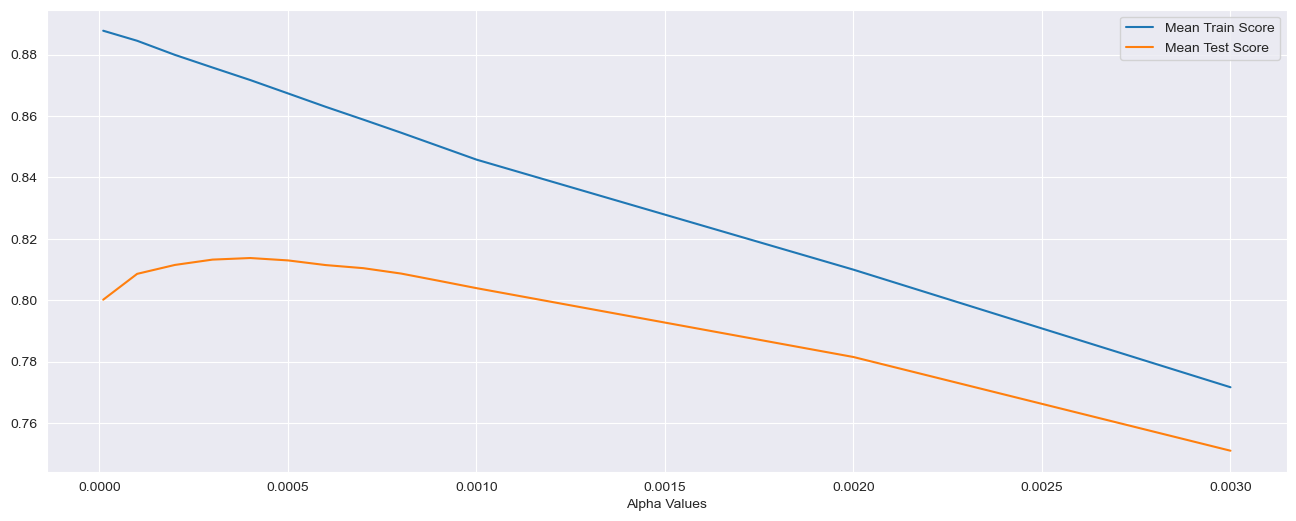

In [83]:
# Plotting the values of alpha and determined scores to visually see the optimal value of alpha
plt.figure(figsize=(16,6))
plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_train_score'])
plt.plot(lasso_model_cv_results['param_alpha'], lasso_model_cv_results['mean_test_score'])
plt.xlabel('Alpha Values')
#plt.xscale('log')
plt.legend(['Mean Train Score', 'Mean Test Score'], loc='upper right')
plt.show()

In [84]:
# Verifying the optimal model coefficients after Lasso regularization
print('Lasso Intercept :', lasso_best.intercept_)
lasso_coef_df = pd.DataFrame(list(zip(X_train.columns, lasso_best.coef_)))
lasso_coef_df.rename(columns={0: 'Feature Variable', 1: 'Lasso Coefficients (alpha = 0.0004)'}, inplace=True)
#lasso_coef_df.set_index('Feature Variable', inplace=True)
lasso_coef_df.sort_values(by='Lasso Coefficients (alpha = 0.0004)', ascending=False,inplace=True)
lasso_coef_df.head(20)

Lasso Intercept : -0.06903511964949693


Feature Variable  Lasso Coefficients (alpha = 0.0004)
11               GrLivArea                             0.229300
1              OverallQual                             0.207251
7              TotalBsmtSF                             0.111975
20              GarageCars                             0.104983
2              OverallCond                             0.054221
47    Neighborhood_NridgHt                             0.045976
18            TotRmsAbvGrd                             0.044758
19              Fireplaces                             0.042408
26             ScreenPorch                             0.038503
9                 2ndFlrSF                             0.036037
4               BsmtFinSF1                             0.035219
122  SaleCondition_Partial                             0.035040
82         BsmtExposure_Gd                             0.028501
53         Condition2_Norm                             0.023443
52         Condition1_Norm                             0.022143
22              WoodDeckSF                             0.021814
12            BsmtFullBath                             0.021590
40       LotConfig_CulDSac                             0.020786
0                  LotArea                             0.020323
55       HouseStyle_1Story                             0.016740

In [85]:
non_zero_var_counts_lasso = len(lasso_coef_df[lasso_coef_df['Lasso Coefficients (alpha = 0.0004)'] != 0])
print('Number of non-zero predictor variables used in Lasso regression: ', non_zero_var_counts_lasso)

Number of non-zero predictor variables used in Lasso regression:  65


In [86]:
lasso_coef_df[lasso_coef_df['Lasso Coefficients (alpha = 0.0004)'] == 0].head(10)

Feature Variable  Lasso Coefficients (alpha = 0.0004)
83     BsmtExposure_Mn                                  0.0
85    BsmtFinType1_BLQ                                  0.0
17        KitchenAbvGr                                  0.0
77   Foundation_CBlock                                  0.0
90    BsmtFinType2_Unf                                  0.0
75        ExterCond_Gd                                 -0.0
73        ExterQual_Gd                                 -0.0
72    MasVnrType_Stone                                  0.0
16        BedroomAbvGr                                 -0.0
70  MasVnrType_BrkFace                                 -0.0

**Observations:**
- Using cross validation, we could see that the optimal value of alpha for which Lasso regularization gives better results is **0.0004**
- Train score and test score are more or less equal and there is no overfitting now.
- There seems to be a slight dip in train score, but it seems to be performing well on the test data.
- Also Lasso regularization model has pushed some of the noisy predictor variable coefficients to zero.
- Optimal Lasso regularization model has used only **65** predictor variables which can ensure the stability of the model

<a id='chosing-final-model'> </a>
## Chosing the final model

### Comparing the model coefficients for all

In [87]:
overall_coef_df = pd.merge(left=linear_model_coef_df,right=ridge_coef_df,on='Feature Variable',how='inner')
overall_coef_df = pd.merge(left=overall_coef_df, right=lasso_coef_df, on='Feature Variable', how='inner')
print(overall_coef_df.shape)
overall_coef_df.head(25)

(123, 4)


Feature Variable  Linear Regression Coefficient  \
0        GarageFinish_NA                   3.231468e+12   
1          GarageQual_NA                   8.542986e+11   
2          GarageCond_NA                   8.542986e+11   
3                MiscVal                   5.168887e+11   
4               PoolArea                   1.693921e+11   
5            TotalBsmtSF                   1.333100e+01   
6            OverallQual                   1.932120e-01   
7           TotRmsAbvGrd                   1.514595e-01   
8               1stFlrSF                   1.461982e-01   
9             GarageCars                   1.335698e-01   
10           OverallCond                   1.113802e-01   
11              2ndFlrSF                   1.010316e-01   
12   Exterior2nd_VinylSd                   8.125828e-02   
13             GrLivArea                   6.531057e-02   
14      Foundation_PConc                   5.392247e-02   
15          BsmtHalfBath                   4.973648e-02   
16  Neighborhood_NridgHt                   4.765180e-02   
17              FullBath                   4.540145e-02   
18   Exterior2nd_Wd Sdng                   4.175675e-02   
19       Condition2_Norm                   4.161855e-02   
20            WoodDeckSF                   4.046969e-02   
21        Functional_Typ                   3.788292e-02   
22           Street_Pave                   3.785556e-02   
23     Foundation_CBlock                   3.736397e-02   
24               LotArea                   3.688276e-02   

    Ridge Coefficients (alpha = 6)  Lasso Coefficients (alpha = 0.0004)  
0                        -0.001700                            -0.000000  
1                        -0.001700                            -0.000000  
2                        -0.001700                            -0.000000  
3                         0.000000                             0.000000  
4                         0.000000                             0.000000  
5                         0.066302                             0.111975  
6                         0.125368                             0.207251  
7                         0.069315                             0.044758  
8                         0.072581                             0.002283  
9                         0.076200                             0.104983  
10                        0.059052                             0.054221  
11                        0.077856                             0.036037  
12                        0.009030                             0.000000  
13                        0.079680                             0.229300  
14                        0.013710                             0.008853  
15                       -0.006265                            -0.000000  
16                        0.040490                             0.045976  
17                        0.030026                             0.000000  
18                        0.018449                             0.000000  
19                        0.045573                             0.023443  
20                        0.030958                             0.021814  
21                        0.020881                             0.014561  
22                        0.019468                             0.000000  
23                        0.005042                             0.000000  
24                        0.033451                             0.020323

**Observations:**
- After regulariztion, Ridge and Lasso have solved the problem of overfitting of the data.
- However Lasso regularization has pushed coefficients of some of the noisy predictor variables to zero, thereby using only predictor variables with influence on the target variable
- Also Lasso regularization has given slightly better test score when compared with Ridge regression.
- **We will be going ahead with Lasso as it seems to be performing well on both train data and test data and model coefficients of some of the noisy variables are pushed to zero**

**Observing the top 10 predictor variables as per Lasso**

In [88]:
overall_coef_df.sort_values(by= 'Lasso Coefficients (alpha = 0.0004)', ascending=False).head(10)

Feature Variable  Linear Regression Coefficient  \
13             GrLivArea                       0.065311   
6            OverallQual                       0.193212   
5            TotalBsmtSF                      13.331002   
9             GarageCars                       0.133570   
10           OverallCond                       0.111380   
16  Neighborhood_NridgHt                       0.047652   
7           TotRmsAbvGrd                       0.151460   
85            Fireplaces                      -0.010029   
25           ScreenPorch                       0.035245   
11              2ndFlrSF                       0.101032   

    Ridge Coefficients (alpha = 6)  Lasso Coefficients (alpha = 0.0004)  
13                        0.079680                             0.229300  
6                         0.125368                             0.207251  
5                         0.066302                             0.111975  
9                         0.076200                             0.104983  
10                        0.059052                             0.054221  
16                        0.040490                             0.045976  
7                         0.069315                             0.044758  
85                        0.044702                             0.042408  
25                        0.049172                             0.038503  
11                        0.077856                             0.036037

- Top 10 predictor variables as per Lasso is `GrLivArea`,`OverallQual`,`TotalBsmtSF`,`GarageCars`,`OverallCond`,`Neighborhood_NridgHt`,`TotRmsAbvGrd`,`Fireplaces`,`ScreenPorch` and `2ndFlrSF`

In [89]:
# Taking the lasso model as the final model
final_model = lasso_best

In [90]:
#Predicting values using final model
y_train_pred_final = final_model.predict(X_train)
y_test_pred_final = final_model.predict(X_test)

<a id='validating-assumptions'> </a>
### Validating the assumptions for Linear regression

**We'll need to validate if our model satisfies the below assumptions for linear regression**

1. Predictor variables should be linearly related to target variable
2. Error terms / residuals are normally distributed.
3. Error terms / residuals are independent of one another, which means there are no observable patterns within them.
4. Error terms have uniform variance

In [91]:
residuals_final = y_train_pred_final - y_train
print(residuals_final[:5])

464    -0.042736
471     0.013138
1332   -0.001410
435     0.017125
1210    0.027273
Name: SalePrice, dtype: float64


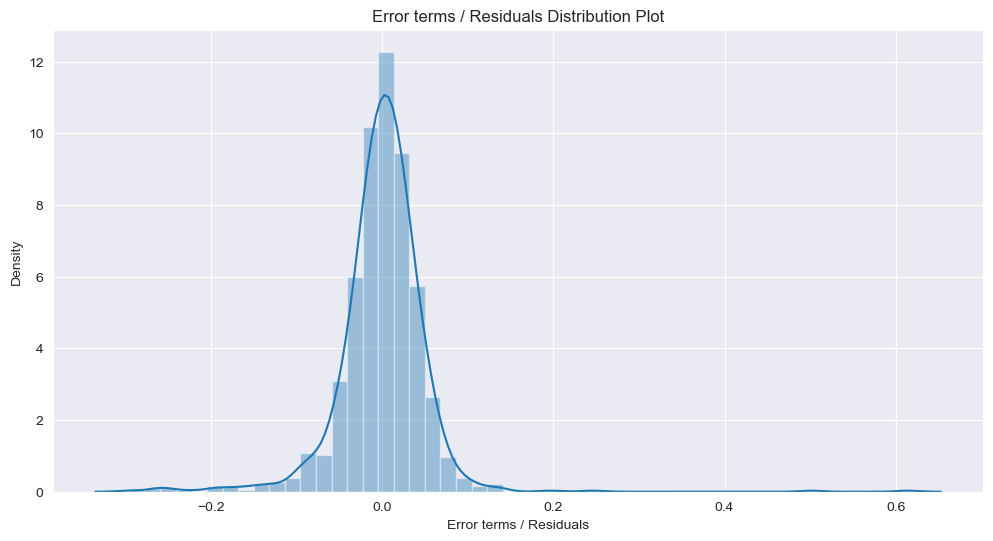

In [92]:
# Plotting a distribution plot of residuals to see how error terms are distributed
plt.figure(figsize=(12, 6))
sns.distplot(residuals_final, bins=50, kde=True)
plt.title('Error terms / Residuals Distribution Plot')
plt.xlabel('Error terms / Residuals')
plt.show()

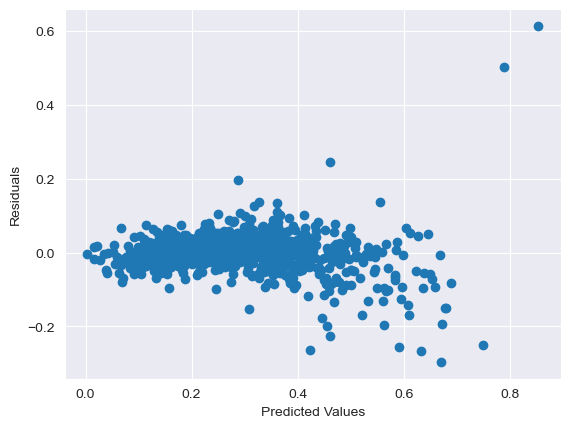

In [93]:
# Plotting a scatter plot to see if there are any patterns in the residuals
plt.scatter(x=y_train_pred_final, y=residuals_final)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Observations:**
- Residuals / error terms are normally distributed with mean around zero.
- There seems to be no patterns in the data. However because of outliers in the data, there seem to be some unequal variance at the top level data. 

<a id='evaluating-the-model'></a>
### Evaluating the model

In [94]:
# Evaluating the final model
print('Final Model Train r2 score: ', r2_score(y_true=y_train, y_pred=y_train_pred_final))
print('Final Model Test r2 score: ', r2_score(y_true=y_test, y_pred=y_test_pred_final))
print('Final Model Train RMSE: ', np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred_final)))
print('Final Model Test RMSE: ', np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred_final)))

Final Model Train r2 score:  0.8650245670571609
Final Model Test r2 score:  0.8733143909901192
Final Model Train RMSE:  0.05274528456896703
Final Model Test RMSE:  0.05002897359654216


In [95]:
final_model_coef_df = pd.DataFrame(list(zip(X_train.columns, final_model.coef_)))
final_model_coef_df.rename(columns={0: 'Feature Variable', 1: 'Lasso Coefficients (alpha = 0.0004)'}, inplace=True)
final_model_coef_df.sort_values(by='Lasso Coefficients (alpha = 0.0004)', ascending=False,inplace=True)
final_model_coef_df.head()

Feature Variable  Lasso Coefficients (alpha = 0.0004)
11        GrLivArea                             0.229300
1       OverallQual                             0.207251
7       TotalBsmtSF                             0.111975
20       GarageCars                             0.104983
2       OverallCond                             0.054221

<a id='summary'></a>
### Summary

**Below is the summary of what we have done so far:**
1. We have imported the data and had a quick look at the data
2. Few predictor variables have missing values, they are identified and handled appropriately.
3. Data cleaning is performed to drop unnecessary columns, to convert columns to correct data types and to detect the outliers and handle them appropriately.
4. We have visually inspected the data by splitting it into categorical and numeric variables to get more insights / to identify visible patterns in the data
5. We did data pre-processing such as splitting the data into train and test data sets, encoding categorical variables and to perform scaling on numerical features to get stable & uniform coefficients
6. As part of model building, we first built the model using plain linear regression and then applied regularization using Ridge and Lasso to avoid overfitting of the data
    - Used cross validation to identify the optimal value of alpha for which Ridge / Lasso regularization gives best results.
    - Optimal value of alpha turned out to be `6` and `0.0004` for Ridge and Lasso respectively.
    - Lasso model gave slightly better test results and it also have used less number of predictor variables.
    - So we decided to pick the Lasso as final model.
7. Then we validated the basic assumptions of linear regression and evaluated our final model on the test data.
8. We got train r2 score of 0.865 and test r2 score of 0.873 using our final model
9. **Top 5 significant predictor variables as per our final model are `GrLivArea`, `OverallQual`,`TotalBsmtSF`,`GarageCars` and `OverallCond`**

<a id='subjective-questions'></a>
## Subjective Questions

<a id='question-1'></a>
**Question 1**

**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?** 

- As per our model, we got optimal value of alpha as 6 for Ridge and 0.0004 for Lasso
- Buildign new models using double the values of optimal alpha for both Ridge and Lasso

In [96]:
# Fitting the model again by doubling the alpha value for ridge
ridge_double_alpha = ridge_optimal_alpha * 2
print(ridge_double_alpha)

ridge_model_double_alpha = Ridge(alpha=ridge_double_alpha)
ridge_model_double_alpha.fit(X=X_train, y=y_train)

12.0


Ridge(alpha=12.0)

In [97]:
y_train_ridge_double_alpha = ridge_model_double_alpha.predict(X=X_train)
y_test_ridge_double_alpha = ridge_model_double_alpha.predict(X=X_test)

# Model Evaluation
print('Ridge double alpha Model Train r2 score: ', r2_score(y_true=y_train, y_pred=y_train_ridge_double_alpha))
print('Ridge double alpha Model Test r2 score: ', r2_score(y_true=y_test, y_pred=y_test_ridge_double_alpha))
print('Ridge double alpha Model Train RMSE: ', np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_ridge_double_alpha)))
print('Ridge double alpha Model Test RMSE: ', np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_ridge_double_alpha)))

Ridge double alpha Model Train r2 score:  0.8624591174970875
Ridge double alpha Model Test r2 score:  0.8718237850094093
Ridge double alpha Model Train RMSE:  0.05324418435145916
Ridge double alpha Model Test RMSE:  0.05032243789619592


In [98]:
# Fitting the model again by doubling the alpha value for lasso this time
lasso_double_alpha = lasso_optimal_alpha * 2
print(lasso_double_alpha)

lasso_model_double_alpha = Lasso(alpha=lasso_double_alpha)
lasso_model_double_alpha.fit(X=X_train, y=y_train)

0.0008


Lasso(alpha=0.0008)

In [99]:
y_train_lasso_double_alpha = lasso_model_double_alpha.predict(X=X_train)
y_test_lasso_double_alpha = lasso_model_double_alpha.predict(X=X_test)

# Model Evaluation
print('Lasso double alpha Model Train r2 score: ', r2_score(y_true=y_train, y_pred=y_train_lasso_double_alpha))
print('Lasso double alpha Model Test r2 score: ', r2_score(y_true=y_test, y_pred=y_test_lasso_double_alpha))
print('Lasso double alpha Model Train RMSE: ', np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_lasso_double_alpha)))
print('Lasso double alpha Model Test RMSE: ', np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_lasso_double_alpha)))

Lasso double alpha Model Train r2 score:  0.8484861671021464
Lasso double alpha Model Test r2 score:  0.862609917890011
Lasso double alpha Model Train RMSE:  0.0558833480719556
Lasso double alpha Model Test RMSE:  0.05209975040075592


In [100]:
double_alpha_model_coef_df = pd.DataFrame(list(zip(X_train.columns, ridge_model_double_alpha.coef_, lasso_model_double_alpha.coef_)))
double_alpha_model_coef_df.rename(columns={0: 'Feature Variable', 1: 'Ridge Coefficients Double Alpha', 2: 'Lasso Coefficients Double Alpha'}, inplace=True)
double_alpha_model_coef_df.head()

Feature Variable  Ridge Coefficients Double Alpha  \
0          LotArea                         0.032375   
1      OverallQual                         0.099463   
2      OverallCond                         0.045478   
3       MasVnrArea                         0.025055   
4       BsmtFinSF1                         0.042587   

   Lasso Coefficients Double Alpha  
0                         0.020189  
1                         0.215907  
2                         0.021987  
3                         0.002843  
4                         0.026823

In [101]:
# Top five coefficients as per Ridge after doubling the alpha
double_alpha_model_coef_df.sort_values(by='Ridge Coefficients Double Alpha', ascending=False).head()[['Feature Variable','Ridge Coefficients Double Alpha']]

Feature Variable  Ridge Coefficients Double Alpha
1       OverallQual                         0.099463
11        GrLivArea                         0.067573
20       GarageCars                         0.063899
8          1stFlrSF                         0.062429
9          2ndFlrSF                         0.060980

In [102]:
# Top five coefficients as per Lasso after doubling the alpha
double_alpha_model_coef_df.sort_values(by='Lasso Coefficients Double Alpha', ascending=False).head()[['Feature Variable','Lasso Coefficients Double Alpha']]

Feature Variable  Lasso Coefficients Double Alpha
11        GrLivArea                         0.239859
1       OverallQual                         0.215907
20       GarageCars                         0.102273
7       TotalBsmtSF                         0.088664
19       Fireplaces                         0.048575

In [103]:
print('Number of predictor variables used by Lasso (after excluding ones with zero coefficients): ', len(double_alpha_model_coef_df[double_alpha_model_coef_df['Lasso Coefficients Double Alpha'] != 0]))

Number of predictor variables used by Lasso (after excluding ones with zero coefficients):  51


**Quick Observations:**
- Doubling the alpha value caused increase in bias as the train and test scores got decreased as more coefficients got shrinked towards zero.
- It has led to slightly underfitting of the data when compared with the results given by the Ridge and Lasso models with the optimal alpha.
- In Lasso, more variables got pushed to zero when the alpha value is doubled and the final number of variables with non-zero coefficients stood at 51

**Answer:**
- As per the models built using Cross validation, Optimal values determined for the given dataset are as follows.
    - Ridge - **6**    
    - Alpha - **0.0004**
        
- Below are the key changes we observed when we double the value of alpha for both ridge and Lasso
    - Doubling the value of alpha has shrinked the coefficients further as the penalty imposed has doubled.
    - This caused **slight underfitting of data** as the train and test scores got reduced.
    - In case of Ridge, it was only slight reduction in the scores but where as in case of Lasso, there was a significant decrease in train and test scores after doubling the value of alpha from optimal one.
    - In case of Lasso, more number of variables got their coefficients pushed to zero.
    - Even the order of important predictor variables got slight changes after doubling the value of alpha
    - Below are the key metrics:
        - In case of Ridge, train score got reduced from 0.87 to 0.86
        - In case of Lasso, train score got reduced from 0.88 to 0.84, where as test score got reduced from 0.87 to 0.86
        - Number of predictor variables used in Lasso model got reduced from 65 to 51
    - Important predictor variables after doubling the value of alpha
        - **Ridge** - `OverallQual`, `GrLivArea`,`GarageCars`,`1stFlrSF`,`2ndFlrSF`
        - **Lasso** - `GrLivArea`,`OverallQual`,`GarageCars`,`TotalBsmtSF`,`Fireplaces`

<a id='question-2'></a>
**Question 2**

**You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?** 

**Answer:**
- As per the models built using Cross validation, Optimal values determined for the given dataset are as follows.
    - Ridge - **6**    
    - Alpha - **0.0004**
        
- We decided to go ahead with Lasso regression for the following reasons
    - Our dataset has large number of predictor variables (after performing encoding of categorical variables etc.), this makes the model **complex and overfit the data** as the effect of noisy variables will also get added to the model
    - Unlike ridge, Lasso actually pushes coefficients of some of the predictor variables to actually become zero which have less influence on the target variable essentially performing **feature selection**.
    - Even in our case, lasso model with optimal alpha was using only 65 predictor variables which makes the model little bit simpler.
    - Even though training score of Lasso is little bit less when compared to Ridge, it performed better on the test data.
    - So we decided to go with the Lasso model with optimal value of alpha as 0.0004

<a id='question-3'></a>
**Question 3**

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?** 

Below are the five most important predictor variables in the lasso model that we have built

In [104]:
lasso_coef_df.sort_values(by='Lasso Coefficients (alpha = 0.0004)', ascending=False).head()

Feature Variable  Lasso Coefficients (alpha = 0.0004)
11        GrLivArea                             0.229300
1       OverallQual                             0.207251
7       TotalBsmtSF                             0.111975
20       GarageCars                             0.104983
2       OverallCond                             0.054221

In [105]:
# Creating another model excluding the above five most important predictor variables
five_most_important_predictor_vars = ['GrLivArea','OverallQual','TotalBsmtSF','GarageCars','OverallCond']

#Dropping the above five vars from train and test data
X_train.drop(columns=five_most_important_predictor_vars, inplace=True)
X_test.drop(columns=five_most_important_predictor_vars, inplace=True)
print(X_train.shape)
print(X_test.shape)

(1017, 118)
(437, 118)


In [106]:
# Building the Lasso model using the data after dropping the five important variables
# Using the same optimal alpha determined using Cross validation

print('Lasso Optimal alplha determined using cross validation: ', lasso_optimal_alpha)
lasso_lm_after_dropping_vars = Lasso(alpha=lasso_optimal_alpha)

# Fit the model on train data
lasso_lm_after_dropping_vars.fit(X_train, y_train)

Lasso Optimal alplha determined using cross validation:  0.0004


Lasso(alpha=0.0004)

In [107]:
# Predicting the `SalePrice` values using the model built
y_train_pred_lasso_lm_after_dropping_vars = lasso_lm_after_dropping_vars.predict(X=X_train)
y_test_pred_lasso_lm_after_dropping_vars = lasso_lm_after_dropping_vars.predict(X=X_test)

In [108]:
# Model Evaluation
print('Lasso Model Train r2 score after dropping five important predictors: ', r2_score(y_true=y_train, y_pred=y_train_pred_lasso_lm_after_dropping_vars))
print('Lasso Model Test r2 score  after dropping five important predictors: ', r2_score(y_true=y_test, y_pred=y_test_pred_lasso_lm_after_dropping_vars))
print('Lasso Model Train RMSE  after dropping five important predictors: ', np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred_lasso_lm_after_dropping_vars)))
print('Lasso Model Test RMSE  after dropping five important predictors: ', np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred_lasso_lm_after_dropping_vars)))

Lasso Model Train r2 score after dropping five important predictors:  0.8438492324170305
Lasso Model Test r2 score  after dropping five important predictors:  0.8495863982128582
Lasso Model Train RMSE  after dropping five important predictors:  0.0567320316978244
Lasso Model Test RMSE  after dropping five important predictors:  0.054513178681489735


In [109]:
# Verifying the model coefficients of the new model built after dropping five important predictors
print('Lasso Intercept :', lasso_lm_after_dropping_vars.intercept_)
lasso_after_dropping_coef_df = pd.DataFrame(list(zip(X_train.columns, lasso_lm_after_dropping_vars.coef_)))
lasso_after_dropping_coef_df.rename(columns={0: 'Feature Variable', 1: 'New Lasso Coefficients'}, inplace=True)
lasso_after_dropping_coef_df.sort_values(by='New Lasso Coefficients', ascending=False, inplace=True)
lasso_after_dropping_coef_df.head(10)

Lasso Intercept : 0.030278196722282213


Feature Variable  New Lasso Coefficients
5                 1stFlrSF                0.298077
6                 2ndFlrSF                0.151444
16              GarageArea                0.095508
2               BsmtFinSF1                0.082028
42    Neighborhood_NridgHt                0.058756
15              Fireplaces                0.054723
14            TotRmsAbvGrd                0.051577
21             ScreenPorch                0.051547
117  SaleCondition_Partial                0.038486
77         BsmtExposure_Gd                0.034051

In [110]:
# Below are the five important predictor variables now

lasso_after_dropping_coef_df.sort_values(by='New Lasso Coefficients',ascending=False).head()

Feature Variable  New Lasso Coefficients
5               1stFlrSF                0.298077
6               2ndFlrSF                0.151444
16            GarageArea                0.095508
2             BsmtFinSF1                0.082028
42  Neighborhood_NridgHt                0.058756

**Answer:**
- Five most important predictor variables in the Lasso model with optimal value of alpha (0.0004 in our case) are **`GrLivArea`, `OverallQual`,`TotalBsmtSF`,`GarageCars` and `OverallCond`**
- After dropping the above and building the model again, five most important predictor variables are **`1stFlrSF`, `2ndFlrSF`,`GarageArea`,`BsmtFinSF1` and `Neighborhood_NridgHt`**

<a id='question-4'></a>
**Question 4**

**How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?** 

**Answer:**
- As the model becomes more and more complex, it causes overfitting of the data. Because of which it might perform well on the data, but performs poorly on the unseen data.
- Few possible reasons could be adding more and more predictor variables to the model, using more complex models like polynomial regression of higher degrees even when it is not needed etc.
- Because of this, variance in the model is too high such that even for a small change in the data, there might be a significant impact on the performance of the model
- To make the model more robust and generalisable, we need to make the model simple enough such that it performs well and at the same time doesn't underfit the data.
- Implications of making the model simpler could be slight reduction in accuracy of the model. There might be reduction in the training data, but it would perform well on the unseen data.
- This is generally called as Bias Variance trade off.
- We will compromise little bit on the accuracy front to make the model less variant and make it more robust and generalisable